In [529]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
import os

Define functions:


In [530]:
#def cT1_func(s, a, b, c, d, e ,f, g, h):
    #return np.exp(-a * s) + b / (1 + np.exp(-c * (s - d))) + e * s + f + g * s**2 + h * np.exp(-s)
def cT1_func(s, a, b, c, d):
    return a * s**3 + b * s**2 + c * s + d

In [531]:
#def cT2_func(s, a, b, c, d):
    #return a * s**3 + b * s**2 + c * s + d
def cT2_func(s, a, b, c, d, e, f, g):
    return (a / (1 + np.exp(-b * (s - c)))) + (d * s) + e + (f * s**2) + (g * s**3)

In [532]:
def cT3_func(s, a, b, c, d, e, f, g):
    return (a * np.exp(-b * s)) + (c / (1 + np.exp(-d * (s - e)))) + (f * s) + g

In [533]:
def cT4_func(s, a, b, c, d, e, f, g):
    return (a * s**2 + b * s + c) + (d * np.exp(-e * (s - f)**2)) + (g * s)

In [534]:
def cT5_func(s, a, b, c):
    return a * np.exp(-b * s) + c

In [535]:
def cT6_func(s, a, b, c, d):
    return a * s**3 + b * s**2 + c * s + d 

Load data for StrRt0.0001

In [536]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.0001.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)


Visualize the data

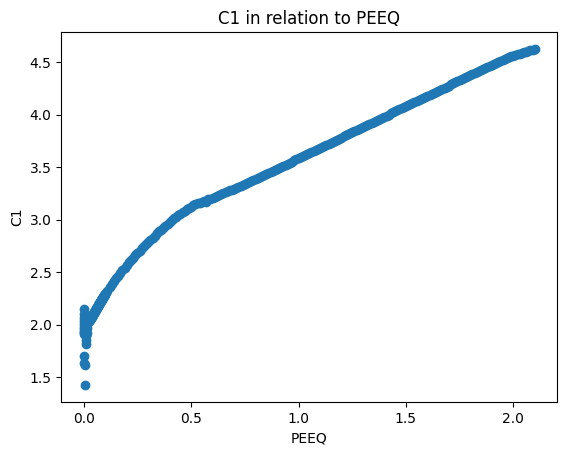

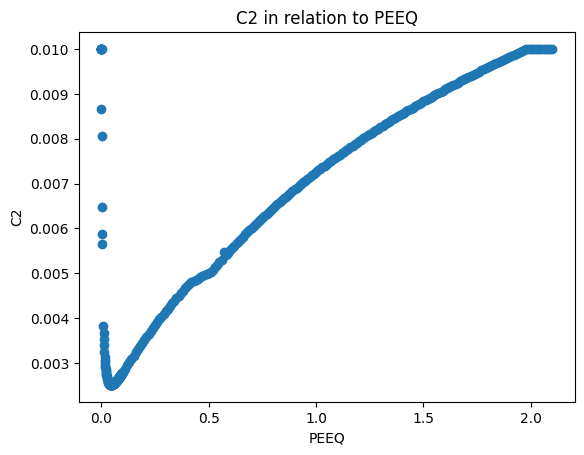

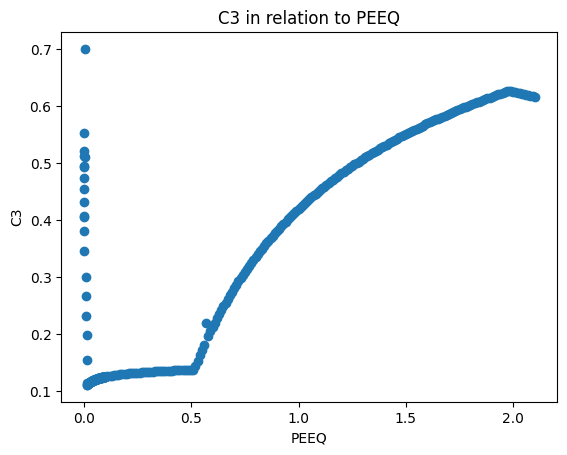

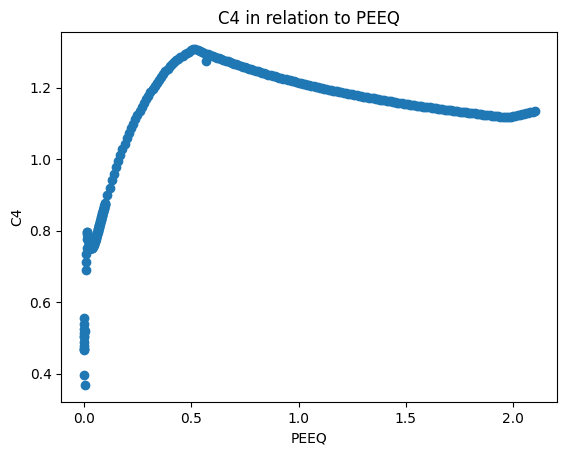

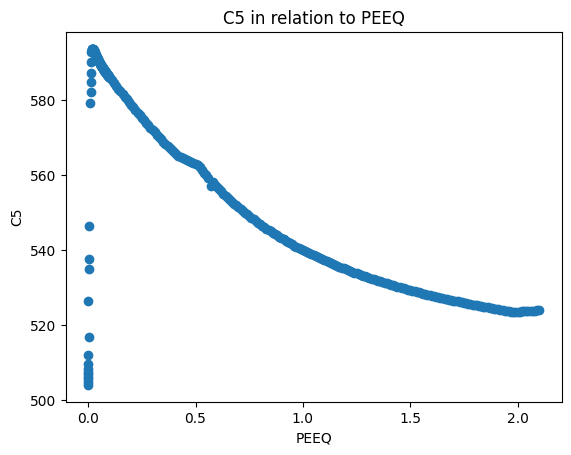

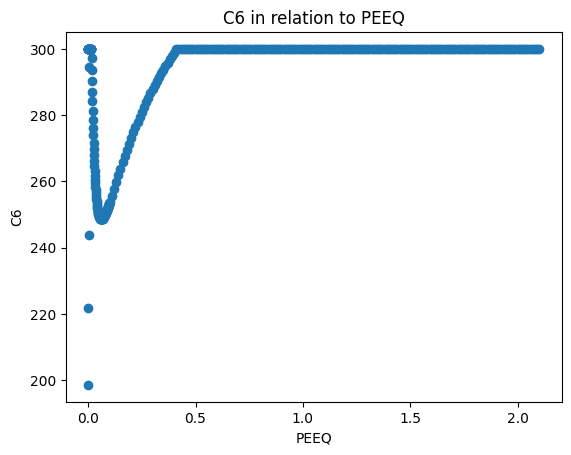

In [537]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

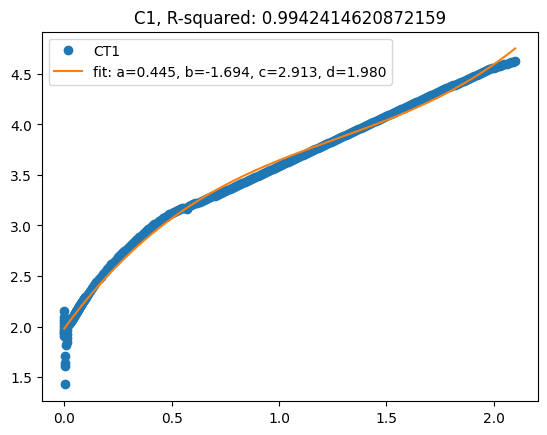

In [538]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [0.1, 0.1, 0.1, 1.5]
param_bounds = ([-10, -10, -10, 1], [10, 10, 10, 5])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

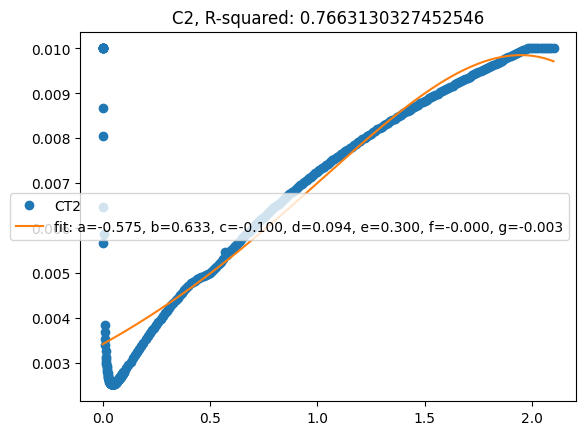

In [539]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f, g)


plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

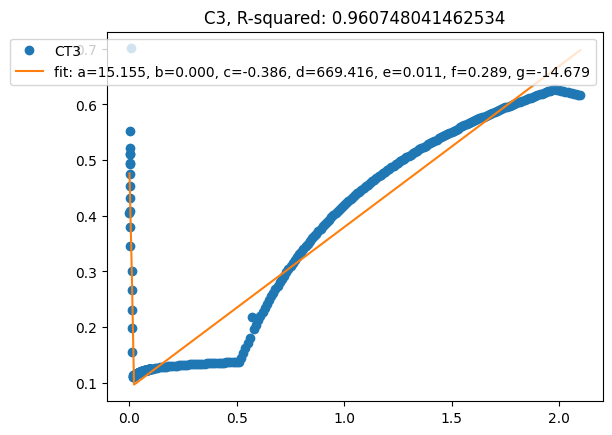

In [540]:
cT3 = data["C3"].to_numpy()
initial_guess = [15, 0.001, 0, 750, 0.02, 0.3, -15]
bounds = ([0, 0, -1, 500, 0, 0, -20], [20, 0.01, 1, 1000, 0.05, 1, 0])

params = curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess,bounds=bounds, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C3, R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

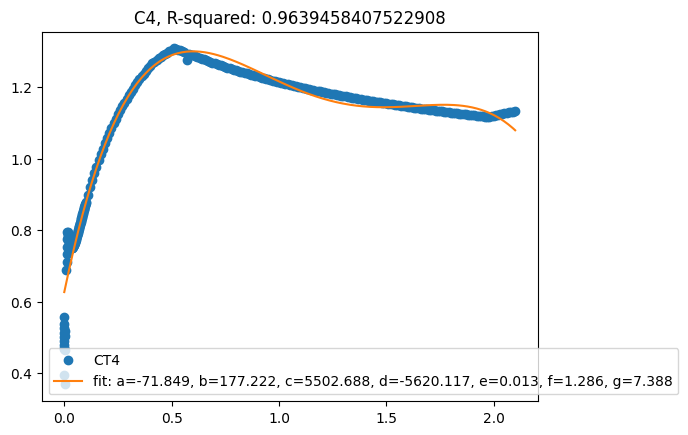

In [541]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C4, R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

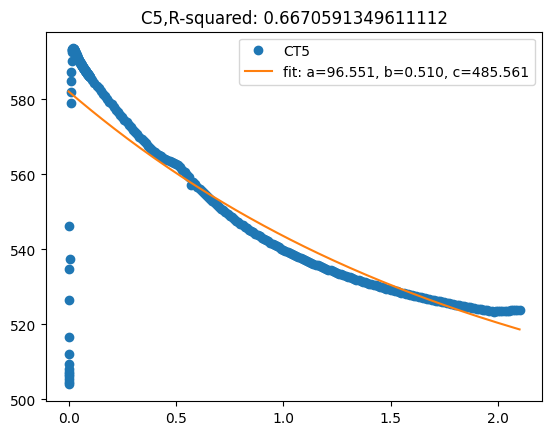

In [542]:
cT5 = data["C5"].to_numpy()
initial_guess = [580, 0.5, 500]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'C5,R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

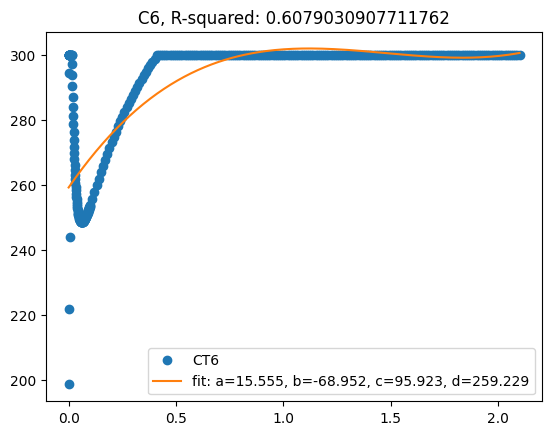

In [543]:
cT6 = data["C6"].to_numpy()
initial_guess = [1, 1, 1, 200]
bounds = ([-1e3, -1e3, -1e3, 0], [1e3, 1e3, 1e3, 1e6])

params = curve_fit(cT6_func, PEEQ, cT6, maxfev=1000000)
[a, b, c, d] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C6, R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [544]:
df_para_fit.to_csv('./para_fit_results_0.0001.csv', index=False)

Use optimized inputs to validate

In [545]:
# Assuming the file is one level up from the current directory
stress_data = pd.read_csv('Fitted_FC_TmpDpn_RD_StrRt0.0001_ref.csv')

fitted_para = pd.read_csv('para_fit_results_0.0001.csv')

[1.36251004 0.72599133 0.4815976  0.72841393 0.82948758 0.82191691
 0.57495016]


C:\Users\socca\AppData\Local\Temp\ipykernel_37396\1491831523.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


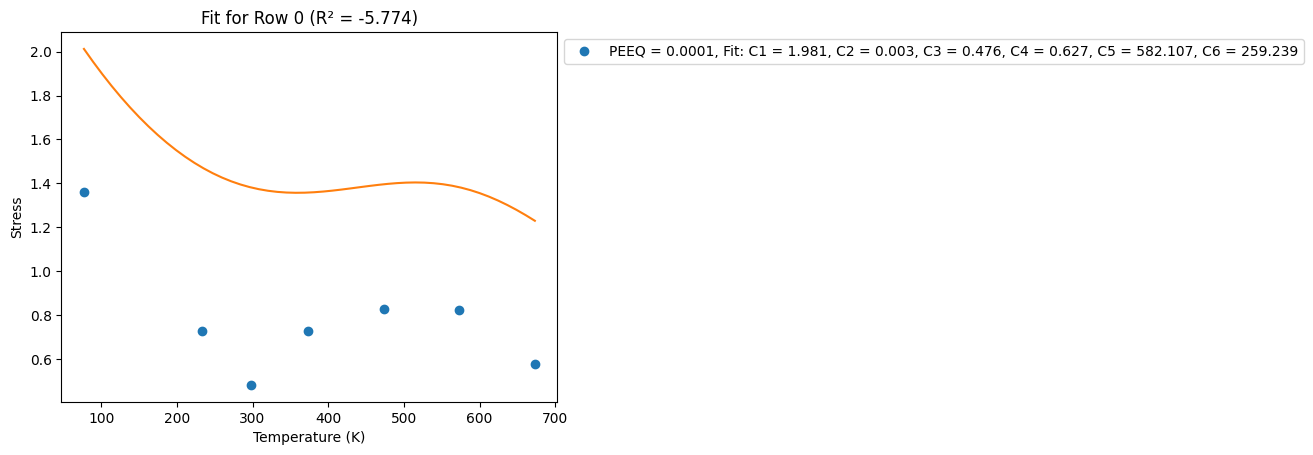

[1.38362624 0.75022644 0.59327141 0.78766057 0.86840388 0.84906686
 0.69294547]


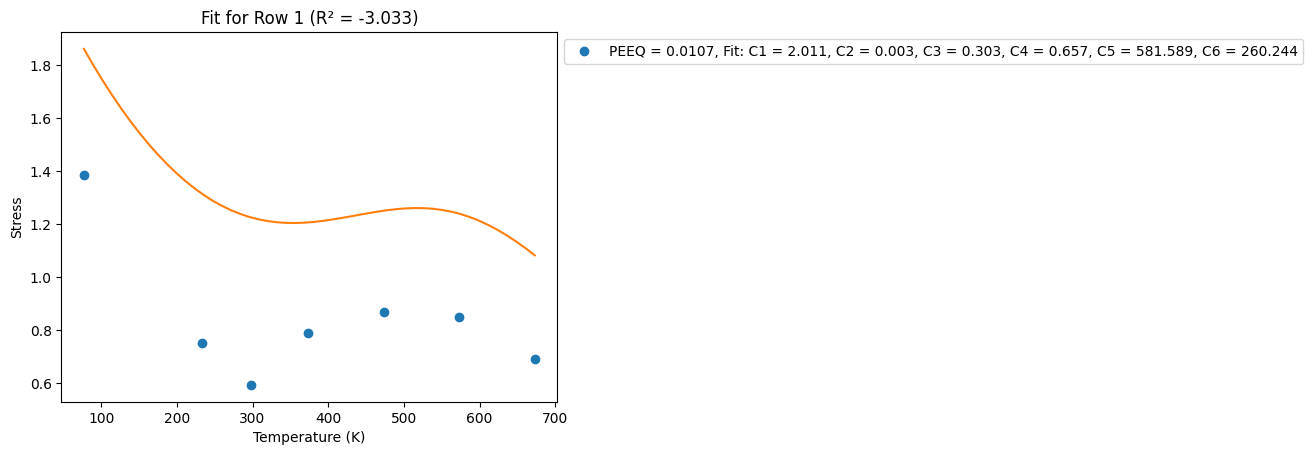

[1.39661004 0.76880383 0.73903496 0.81717545 0.89282197 0.86740631
 0.73184152]


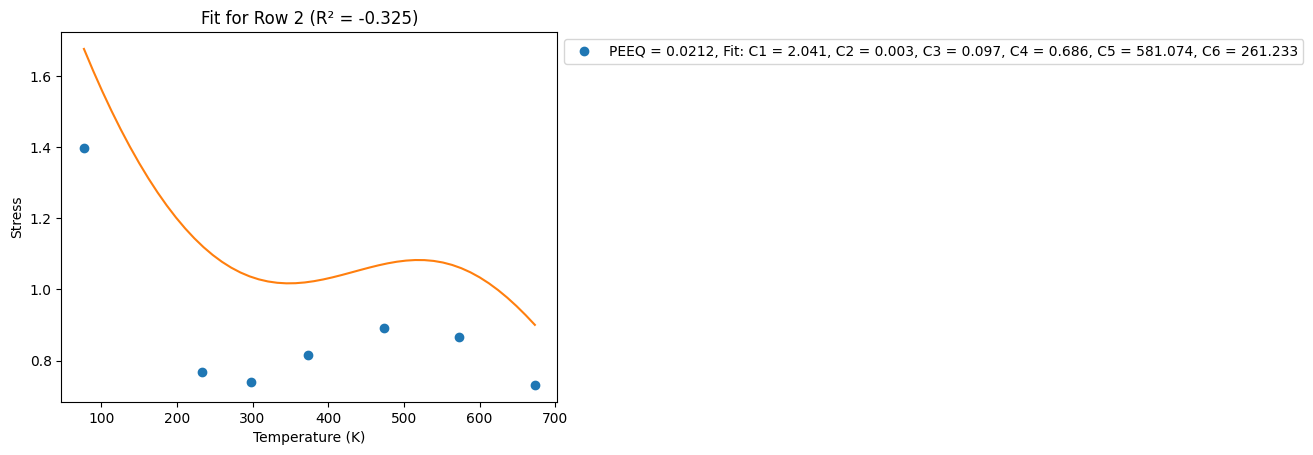

[1.4088003  0.78823669 0.80236574 0.84141439 0.9144373  0.88482855
 0.7604725 ]


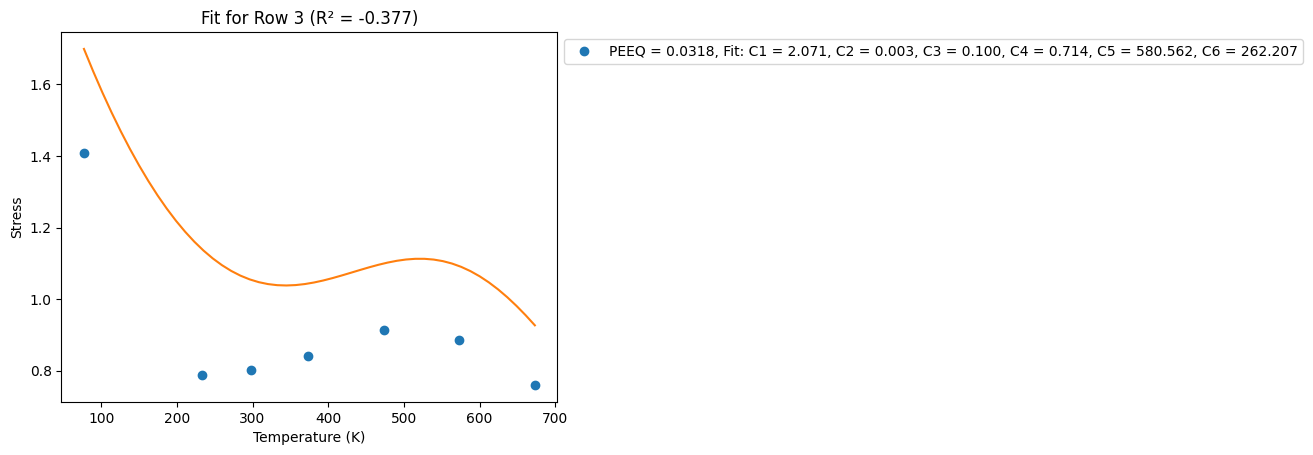

[1.4194923  0.80649924 0.83371755 0.86048538 0.93187057 0.8998833
 0.78170283]


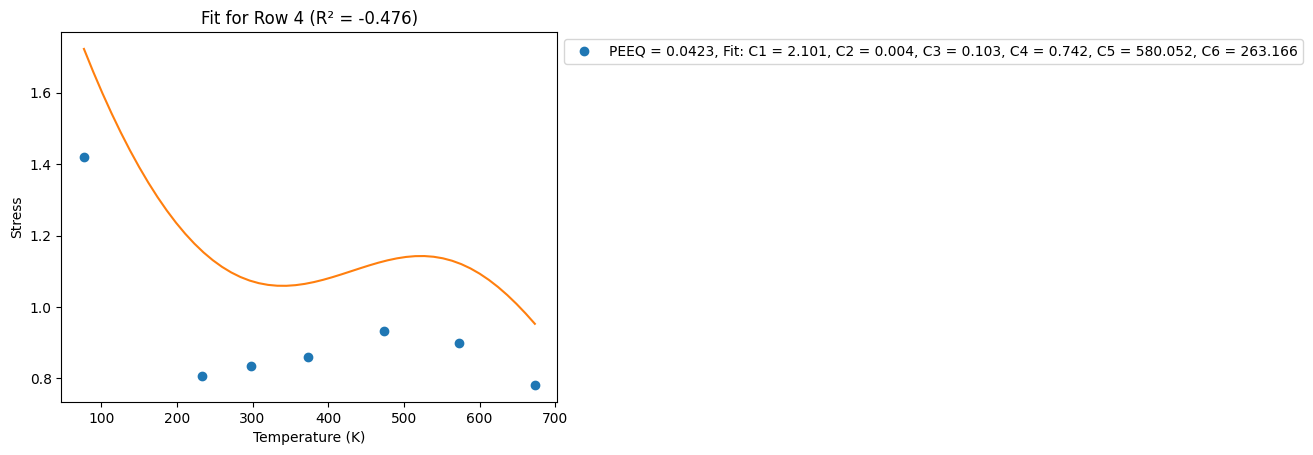

[1.42913371 0.82368626 0.85473254 0.87625236 0.94629534 0.9130995
 0.7986485 ]


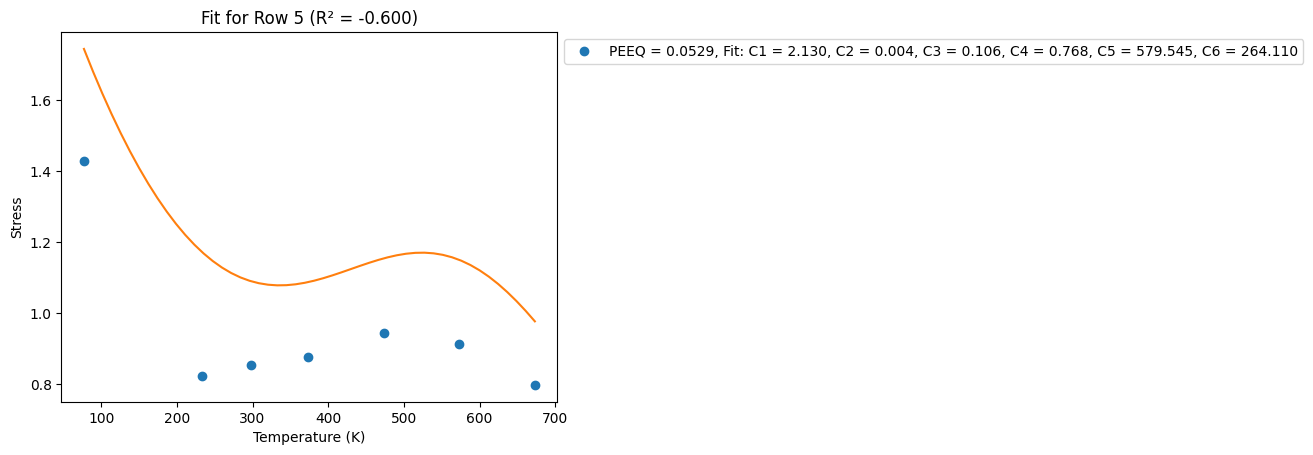

[1.43798219 0.83988294 0.87162077 0.88972207 0.95852643 0.92485234
 0.81279316]


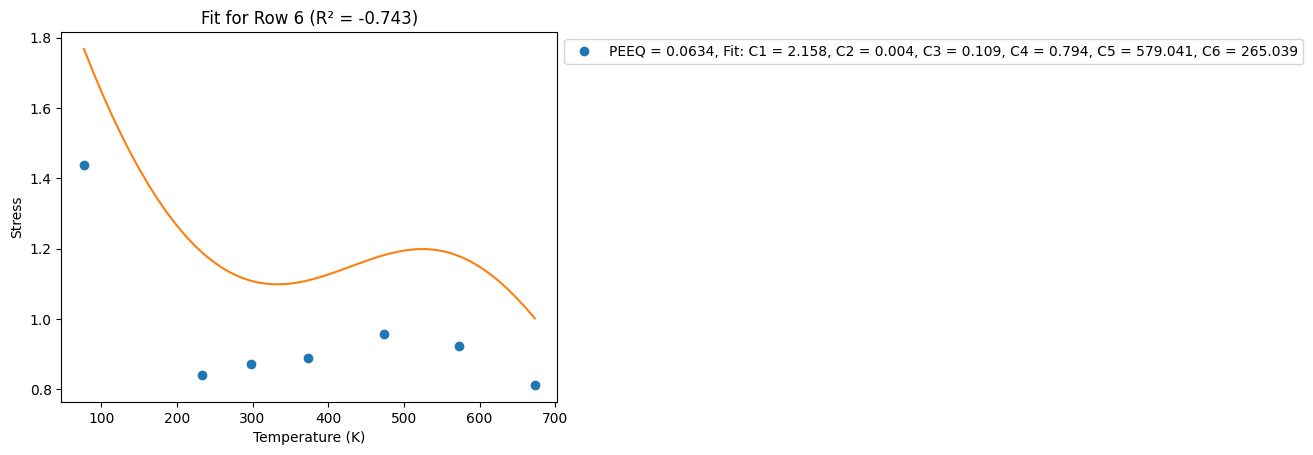

[1.46805583 0.89619448 0.92251927 0.93004991 0.99464934 0.96183385
 0.85385738]


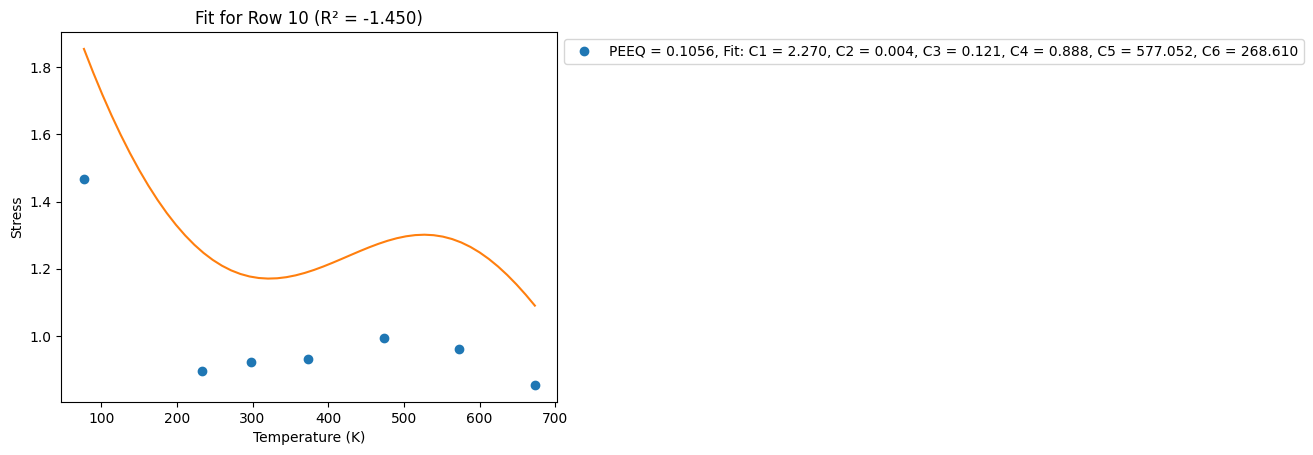

[1.52308237 0.99512694 1.         0.99046308 1.05028236 1.0195775
 0.91318337]


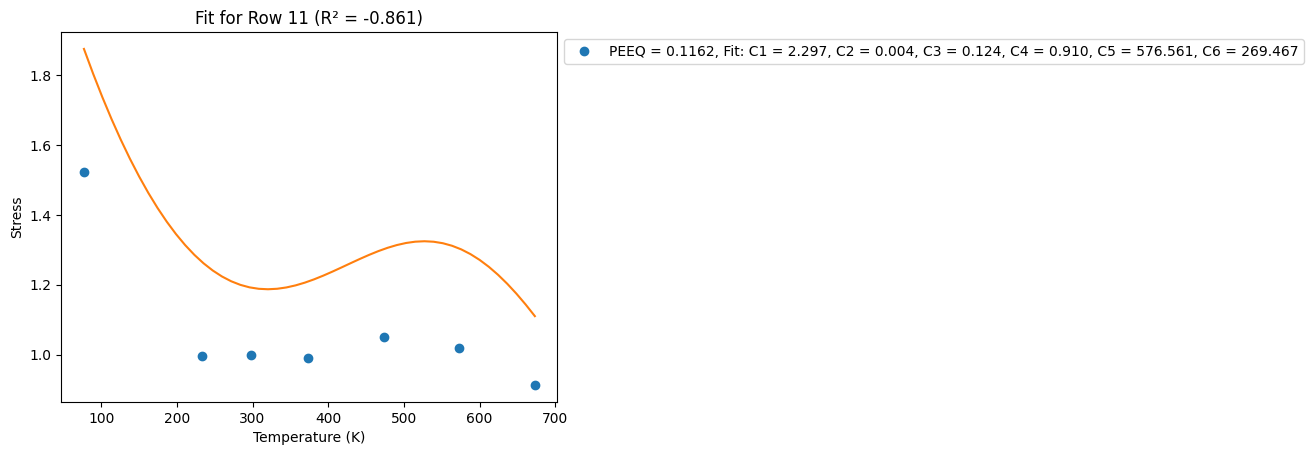

[1.61818012 1.13342744 1.10571589 1.08022565 1.13822488 1.1094487
 0.99792427]


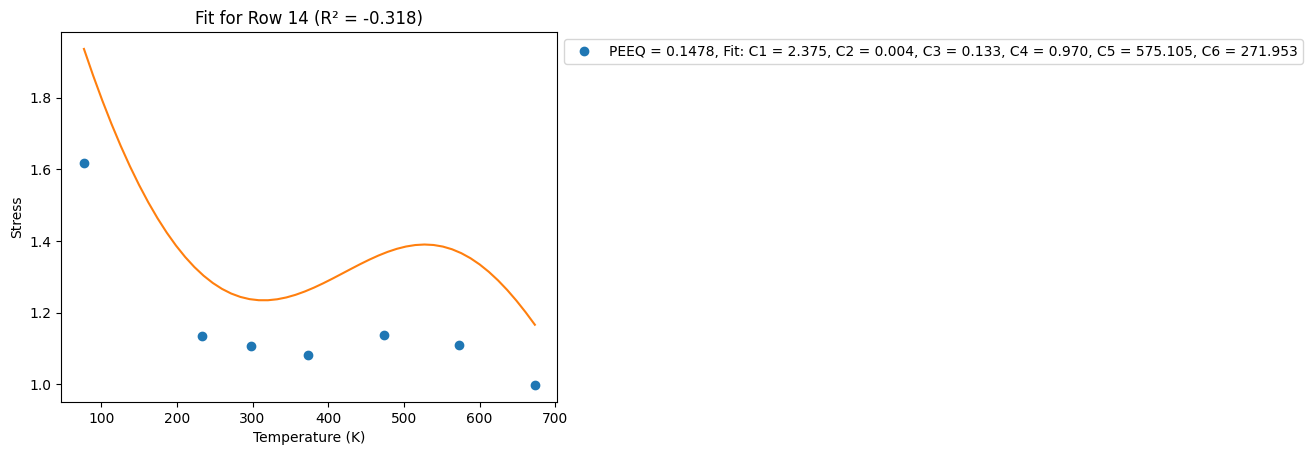

[1.69361316 1.2197177  1.18081648 1.15389214 1.21047734 1.19093161
 1.06323152]


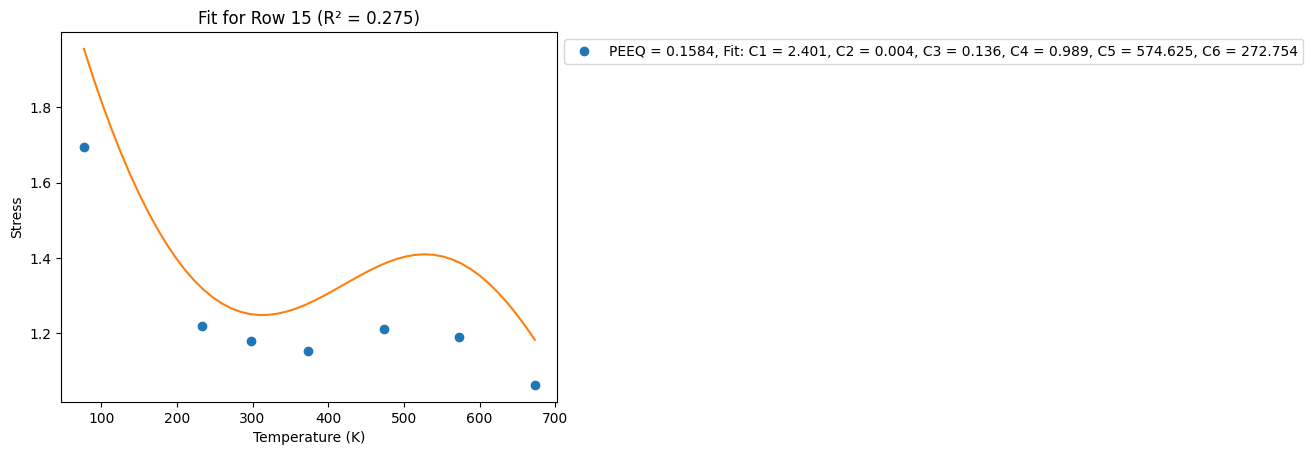

[1.73582767 1.26666909 1.22148435 1.19679938 1.25309879 1.2417217
 1.0992523 ]


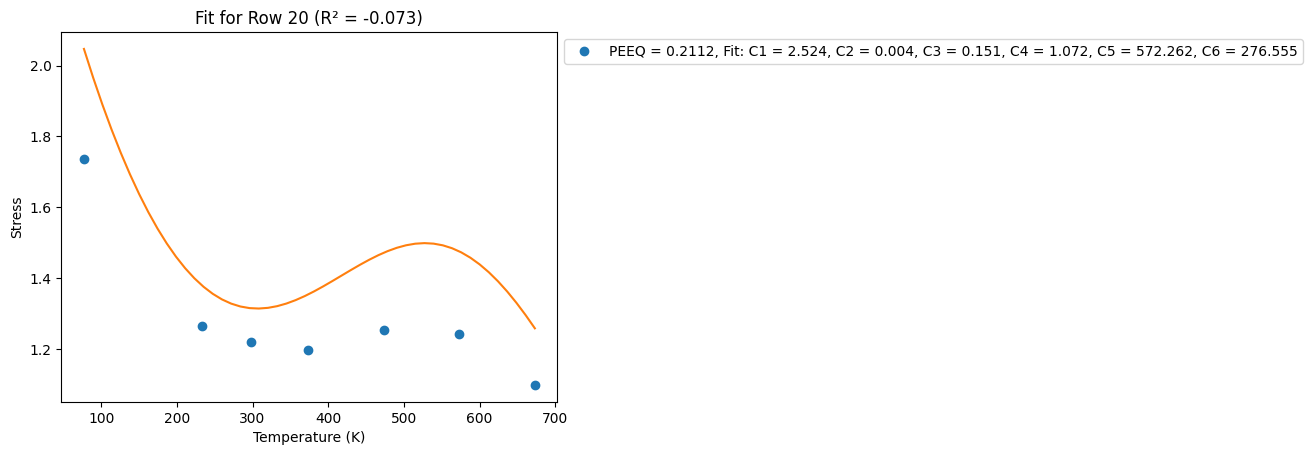

[1.76639812 1.30030023 1.24872655 1.22594285 1.28309271 1.27786607
 1.12333138]


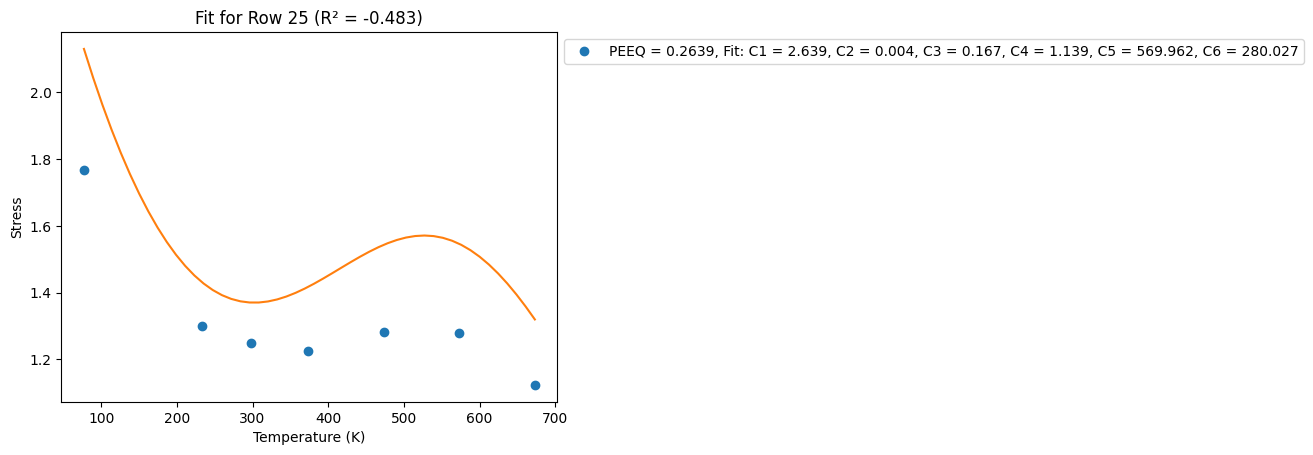

[1.79137792 1.32593264 1.26892168 1.24747859 1.30611125 1.30571746
 1.14129182]


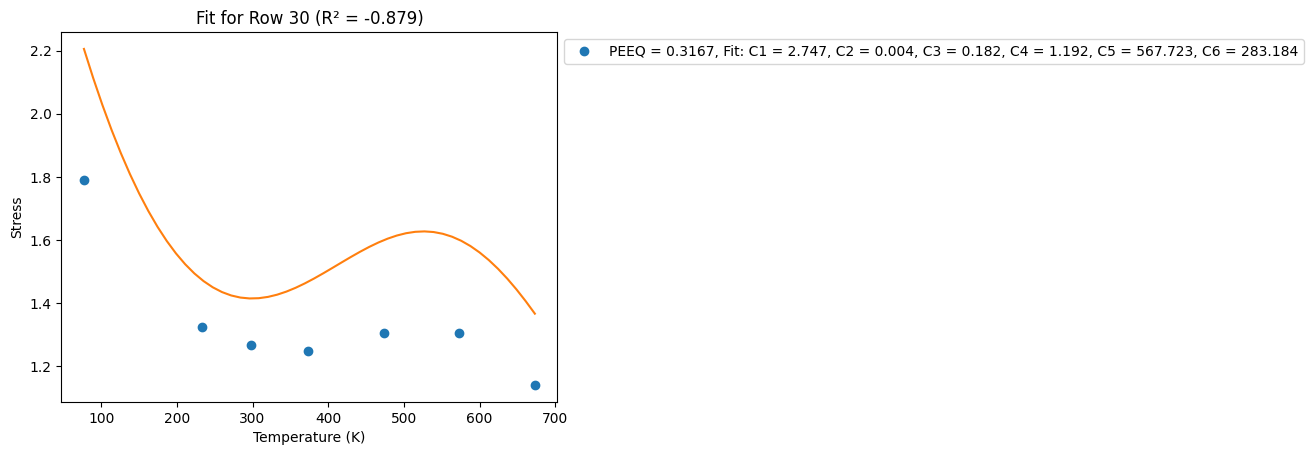

[1.81294897 1.34585779 1.28481835 1.2643595  1.3247201  1.32830697
 1.15564963]


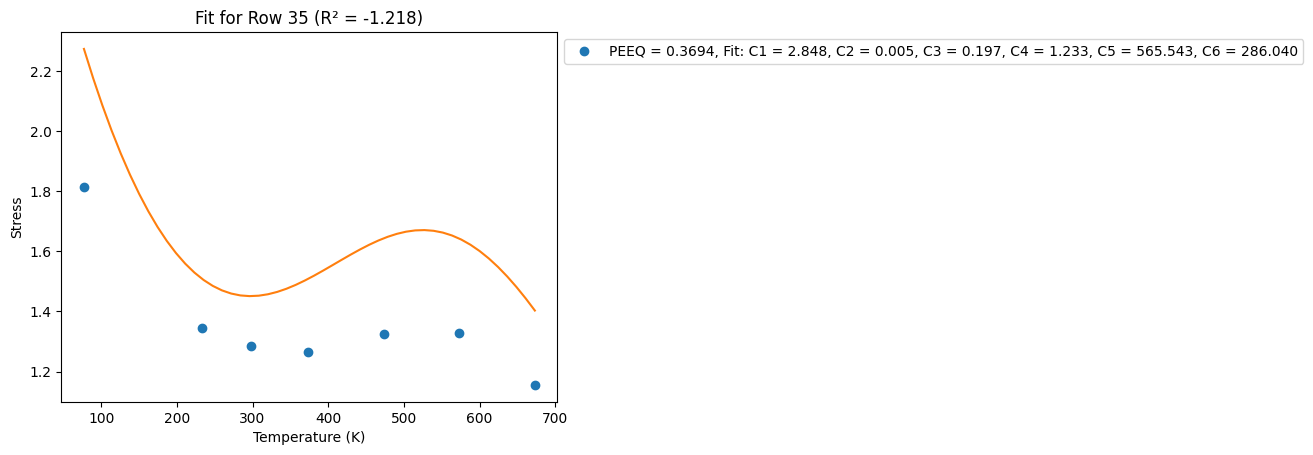

[1.83212564 1.36158161 1.29783969 1.2781888  1.34029708 1.34727573
 1.16765452]


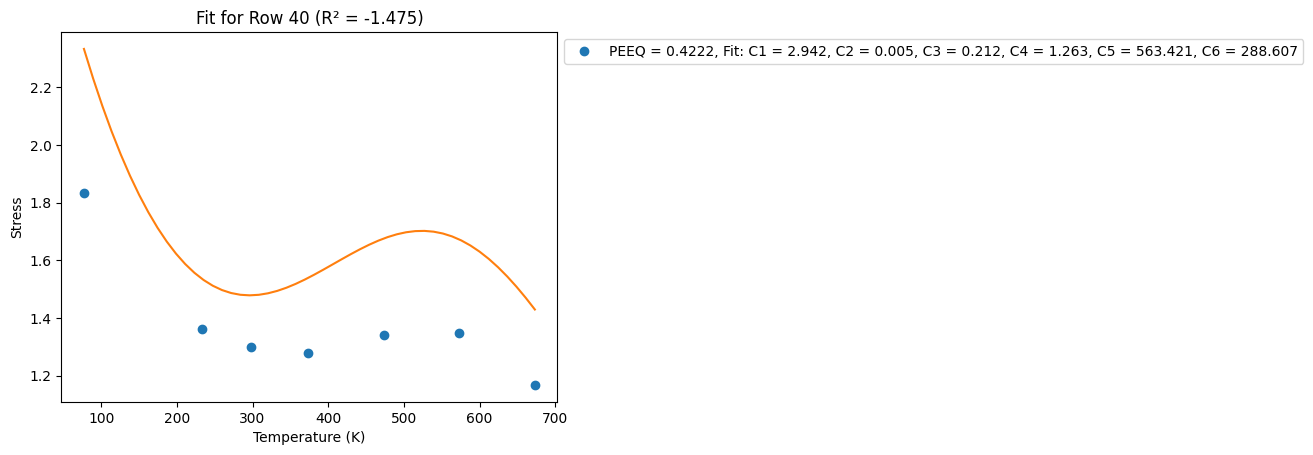

[1.84948588 1.37419193 1.30881299 1.28990356 1.35366587 1.36360489
 1.17799798]


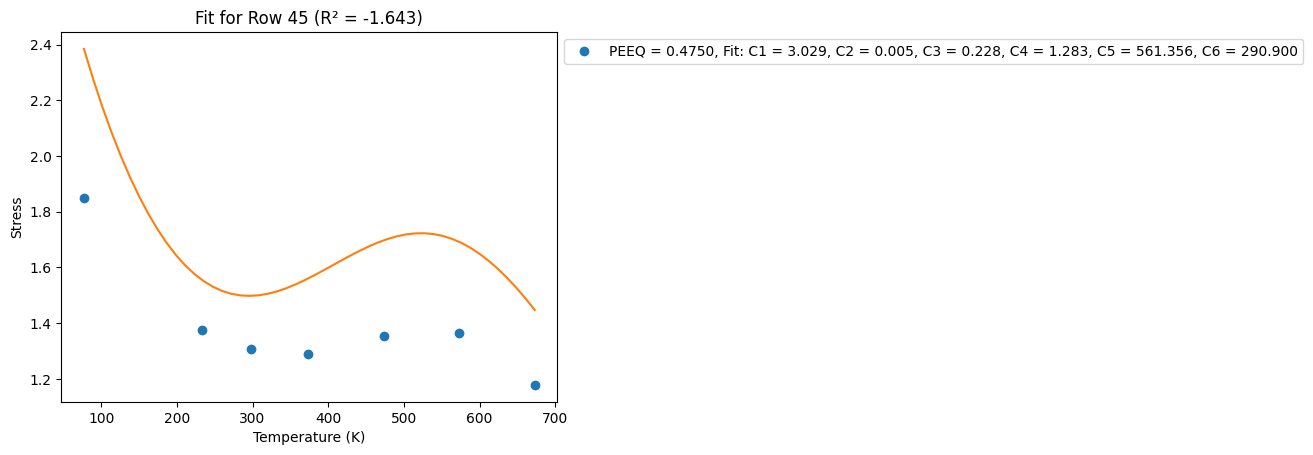

[1.86540465 1.38447627 1.31825937 1.30008214 1.36535724 1.37792634
 1.187099  ]


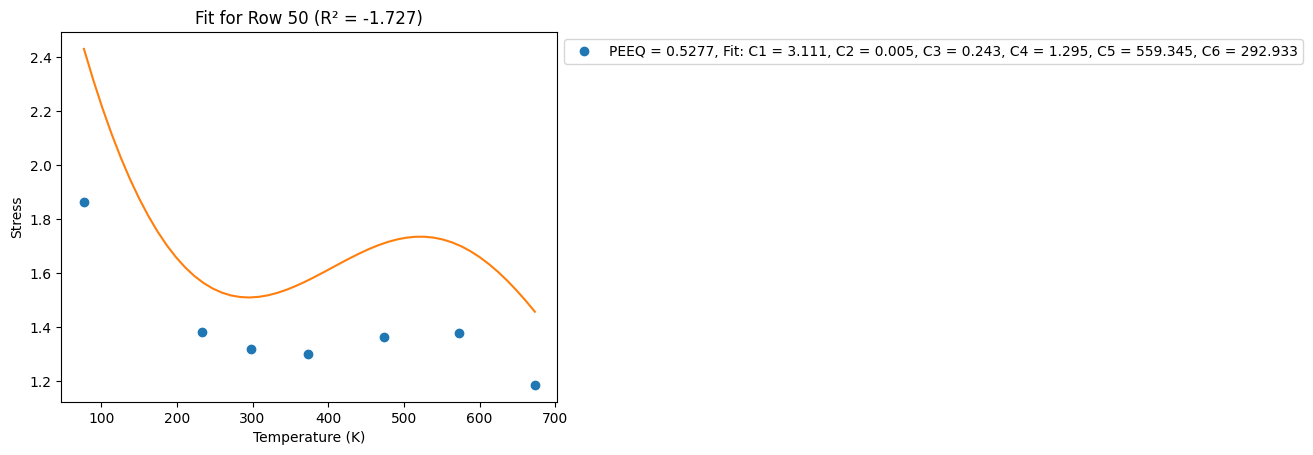

[1.98110548 1.43256427 1.37331745 1.36334497 1.43715622 1.46688103
 1.24474227]


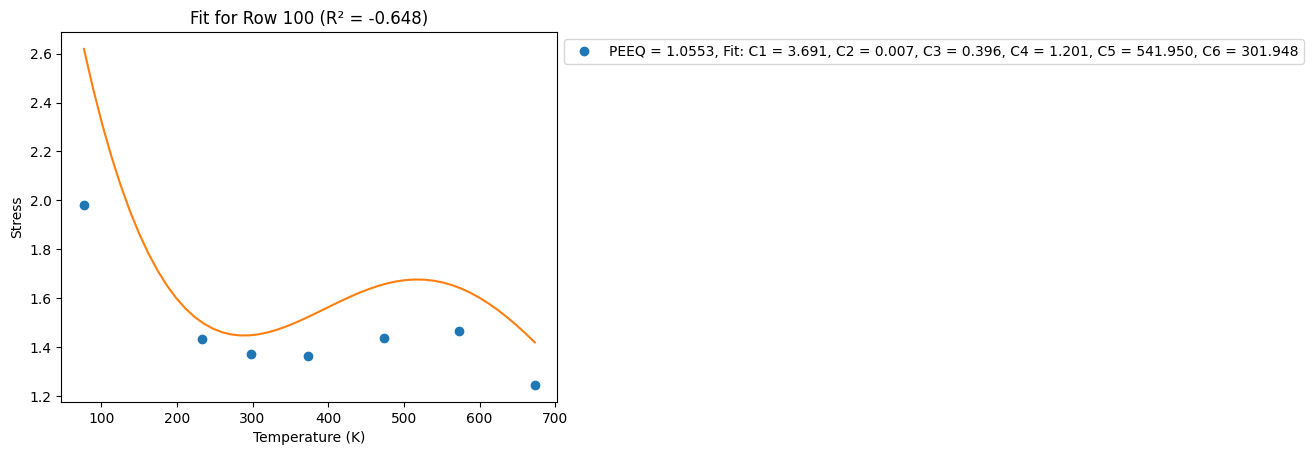

[2.59521003 1.48175971 1.50229406 1.56551056 1.6380874  1.72844315
 1.42941651]


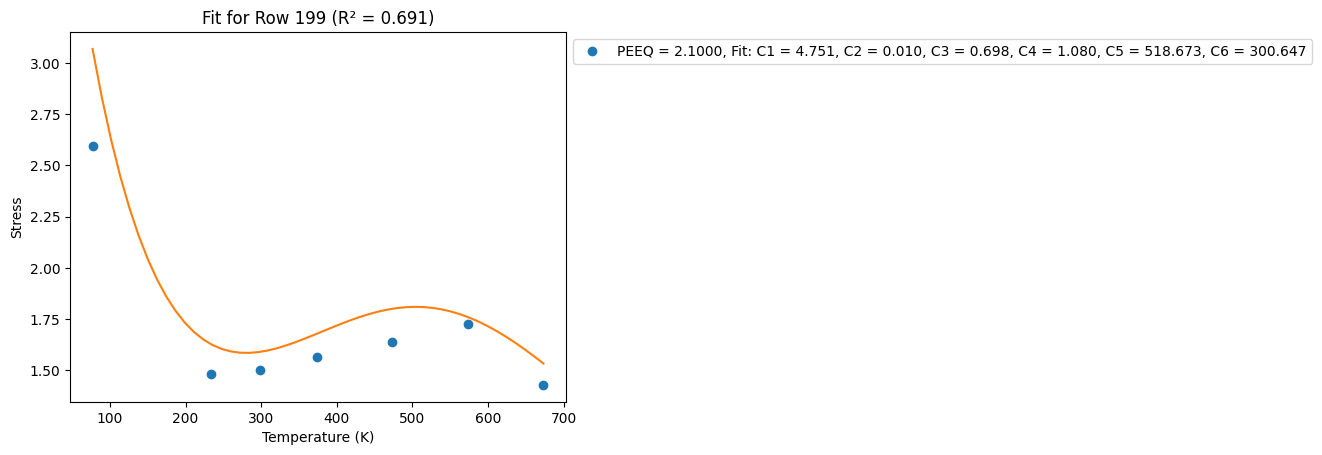

In [546]:
# Temperarute data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

Load data for StrRt 0.001

In [547]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.001.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

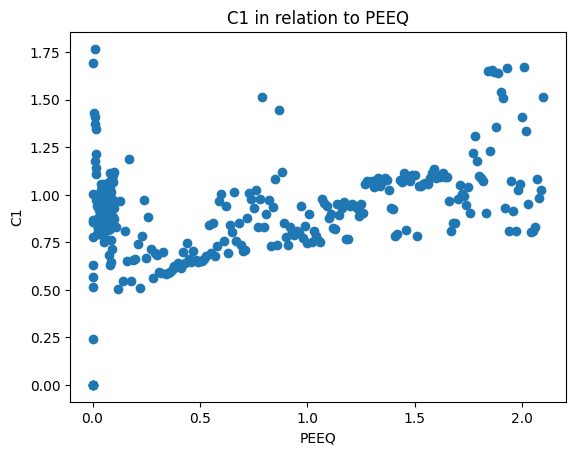

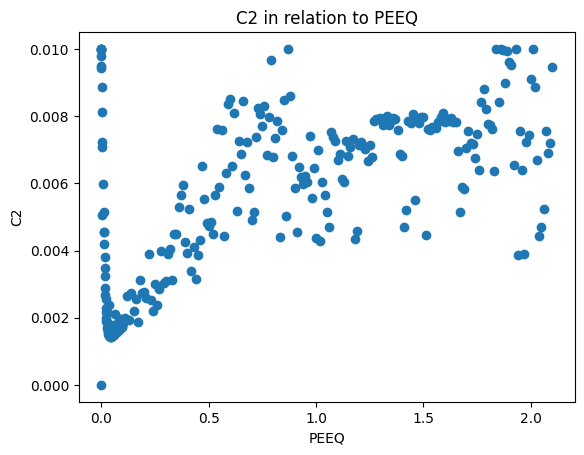

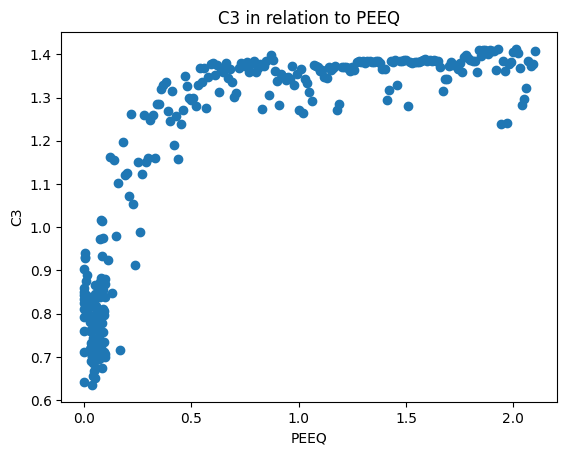

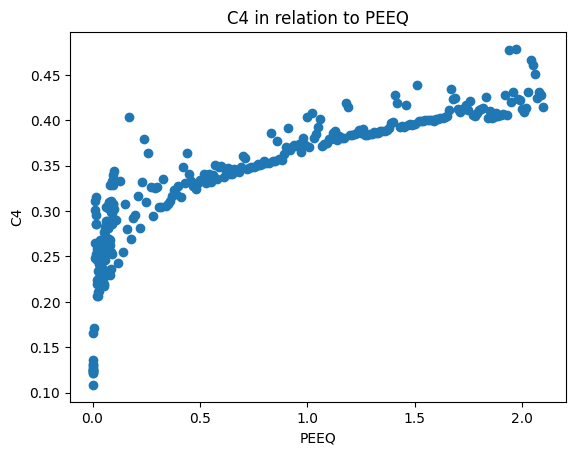

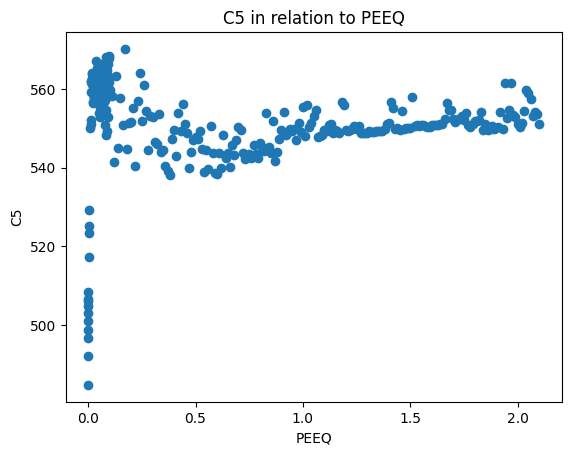

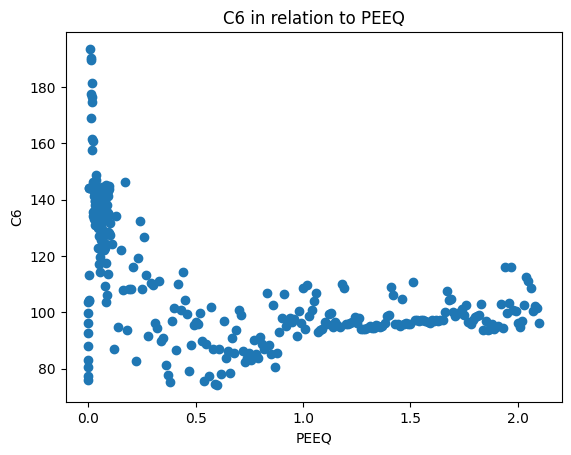

In [548]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

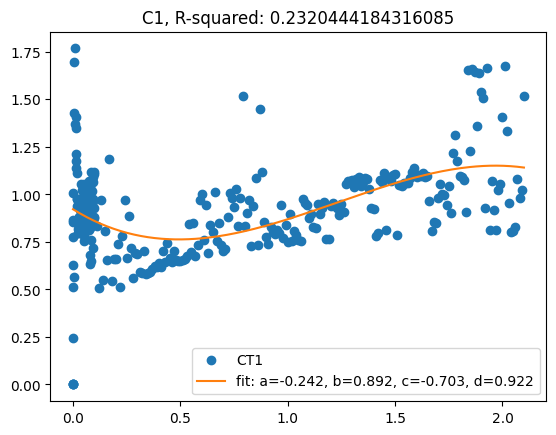

In [549]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [0.1, 0.1, 0.1, np.mean(cT1)]
param_bounds = ([-10, -10, -10, 0], [10, 10, 10, 5])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

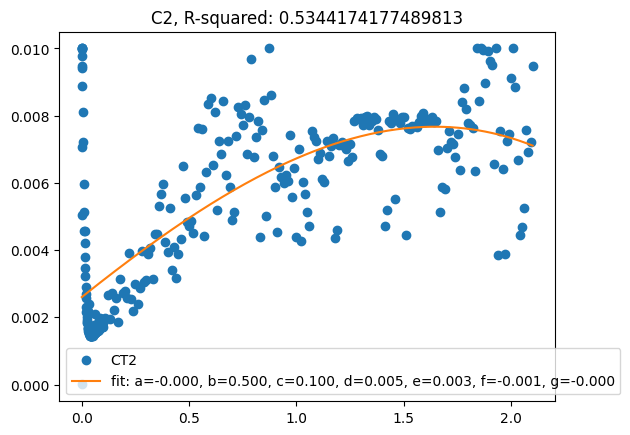

In [550]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f, g)


plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

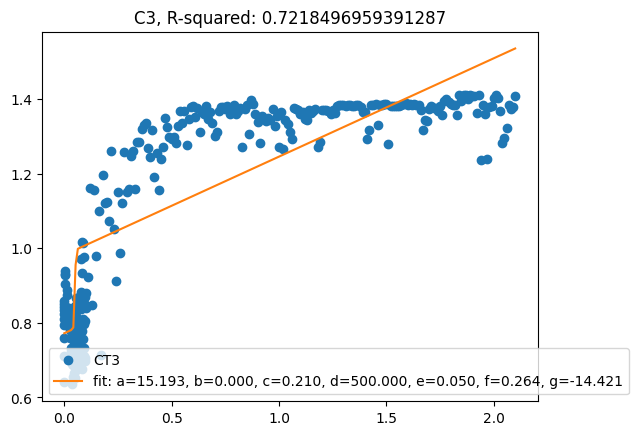

In [551]:
cT3 = data["C3"].to_numpy()
initial_guess = [15, 0.001, 0, 750, 0.02, 0.3, -15]
bounds = ([0, 0, -1, 500, 0, 0, -20], [20, 0.01, 1, 1000, 0.05, 1, 0])

params = curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess,bounds=bounds, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C3, R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

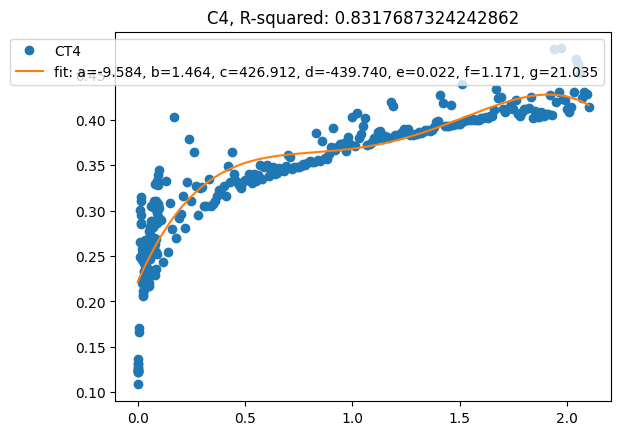

In [552]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C4, R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

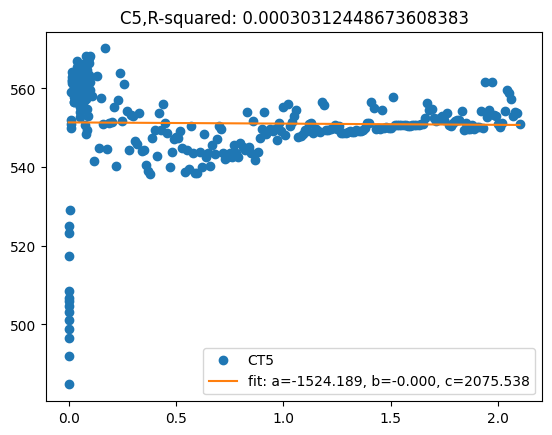

In [553]:
cT5 = data["C5"].to_numpy()
initial_guess = [580, 0.5, 500]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'C5,R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

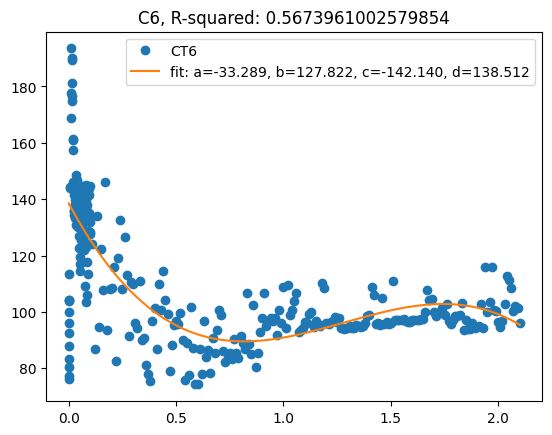

In [554]:
cT6 = data["C6"].to_numpy()
initial_guess = [1, 1, 1, 200]
bounds = ([-1e3, -1e3, -1e3, 0], [1e3, 1e3, 1e3, 1e6])

params = curve_fit(cT6_func, PEEQ, cT6, maxfev=1000000)
[a, b, c, d] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C6, R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [555]:
df_para_fit.to_csv('./para_fit_results_0.001.csv', index=False)

In [556]:
stress_data = pd.read_csv('Fitted_FC_TmpDpn_RD_StrRt0.001_ref.csv')

fitted_para = pd.read_csv('para_fit_results_0.001.csv')

[0.4815976  0.44172149 0.48869714 0.47787062 0.57064533]


C:\Users\socca\AppData\Local\Temp\ipykernel_37396\3597178534.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


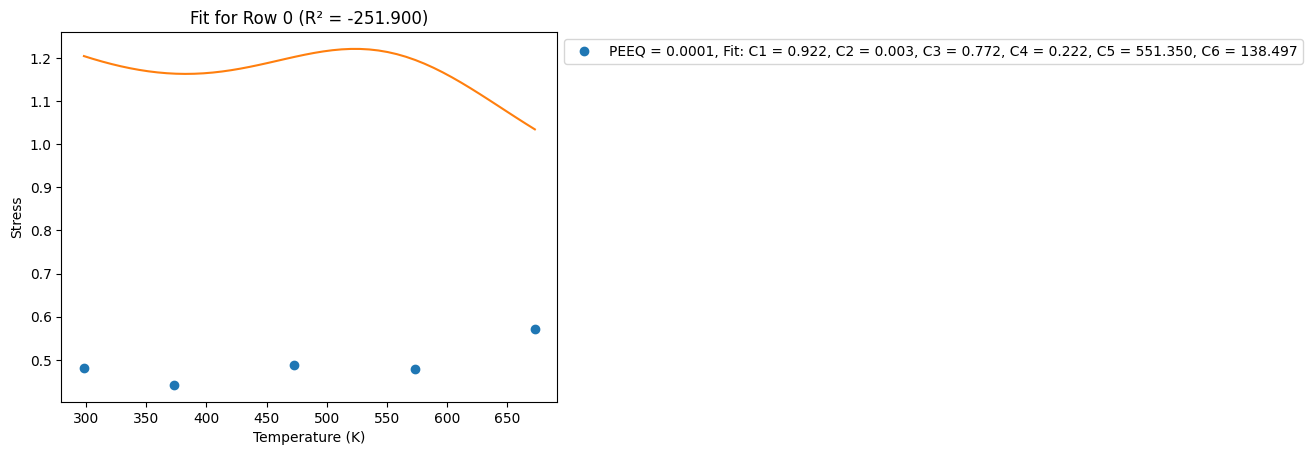

[0.57601343 0.65572495 0.74712496 0.66775175 0.70566256]


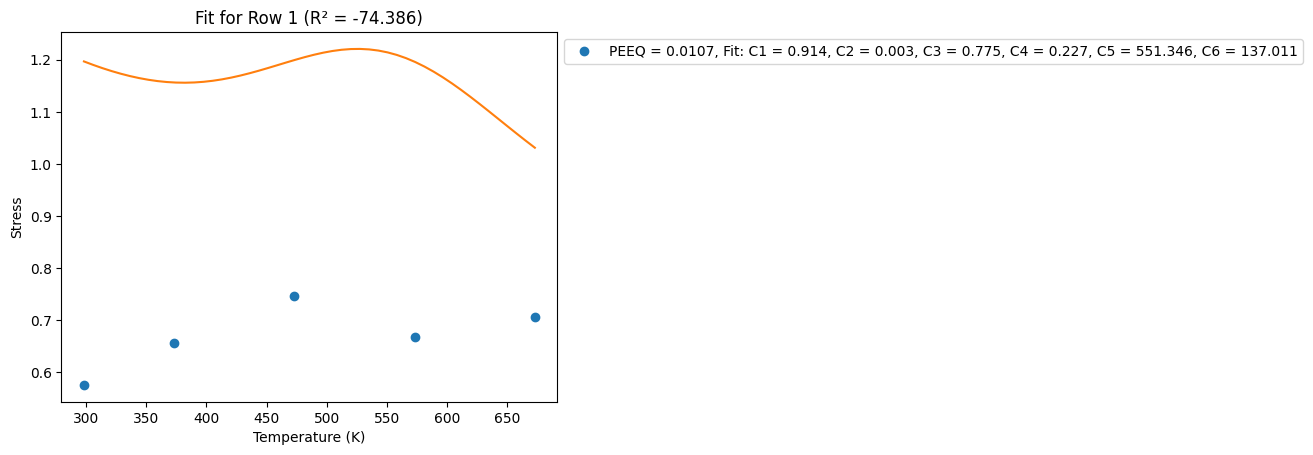

[0.67986511 0.72430089 0.83655173 0.75488067 0.74631593]


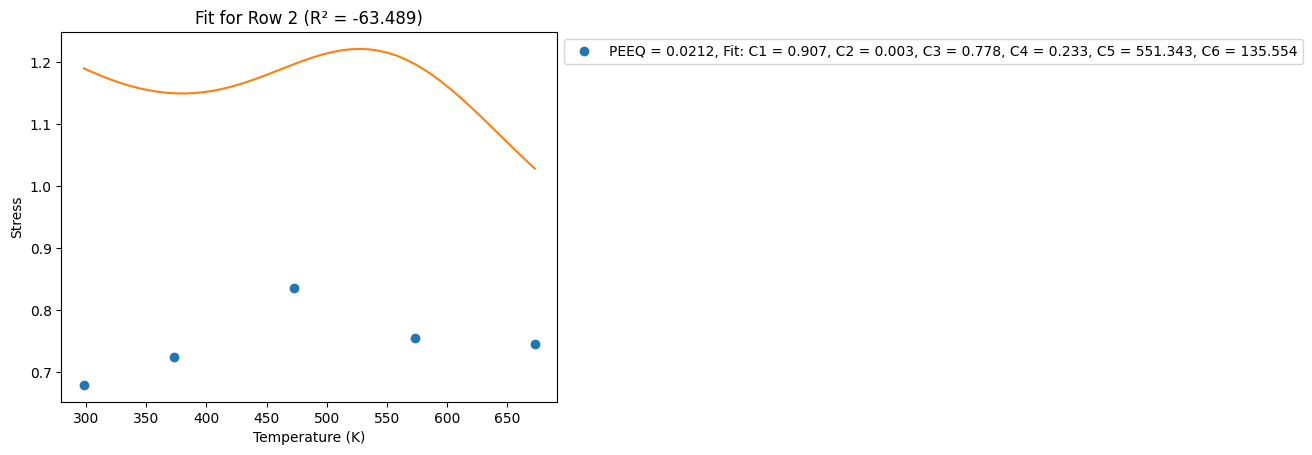

[0.74624037 0.77238182 0.88540299 0.81415057 0.77579979]


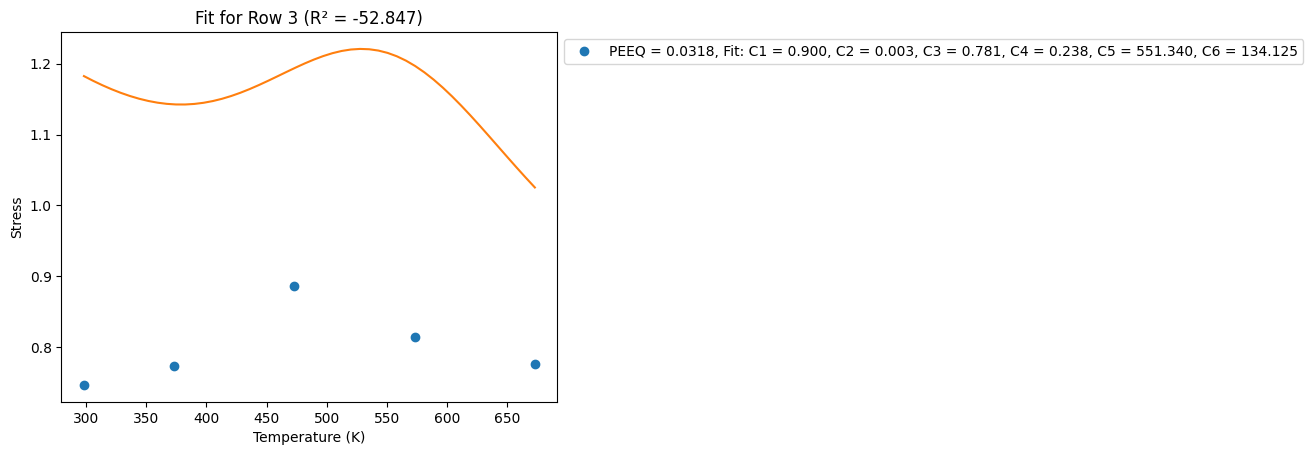

[0.79110903 0.80653391 0.9120024  0.8518493  0.79749993]


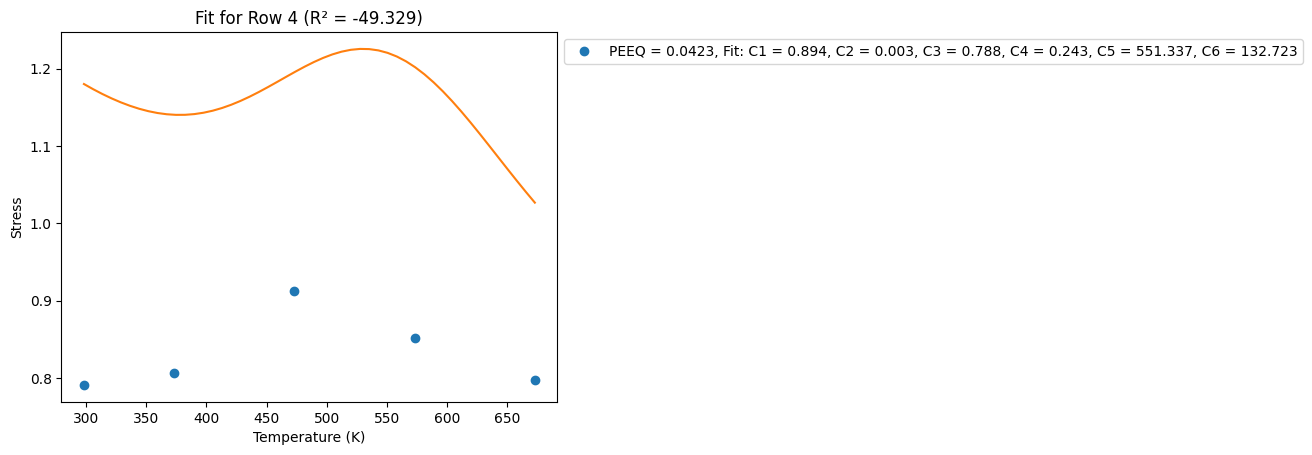

[0.82462434 0.83283683 0.92928763 0.87777945 0.8147444 ]


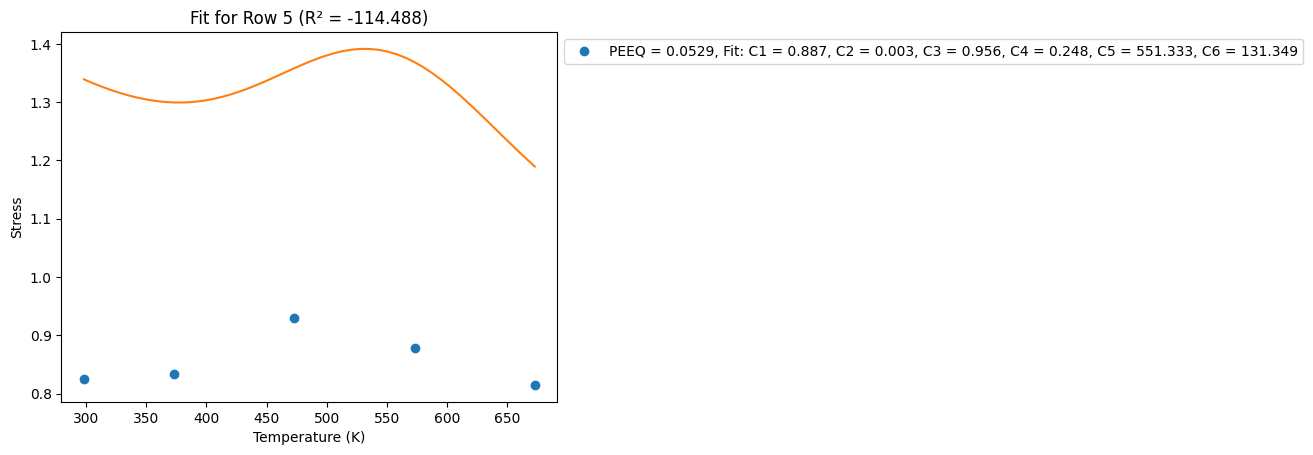

[0.85118774 0.8541365  0.94238591 0.89706747 0.82909505]


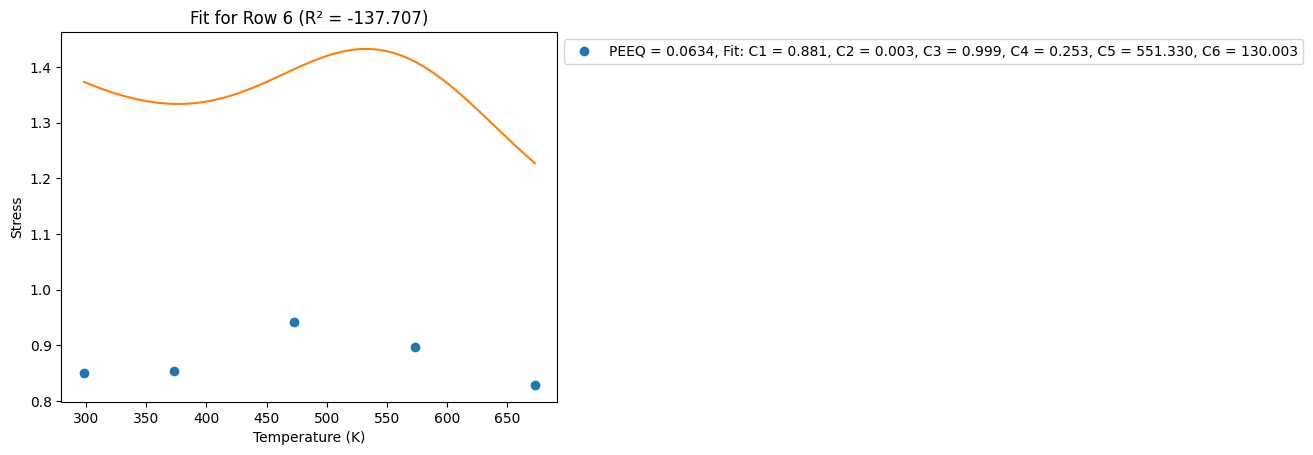

[0.92189443 0.91266789 0.9802331  0.94670556 0.87056589]


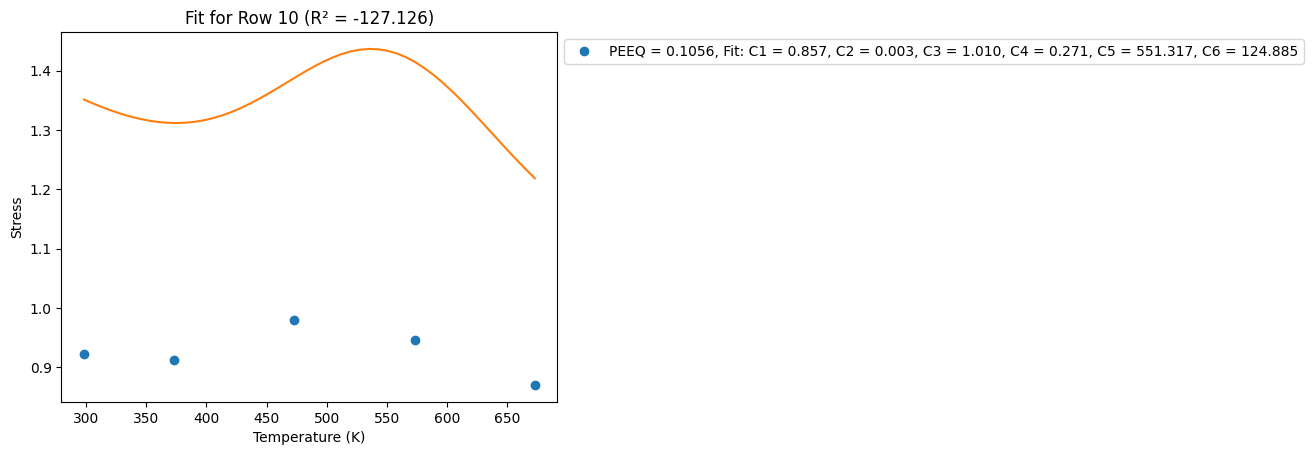

[1.01028423 0.98943993 1.04107032 1.01656866 0.92997319]


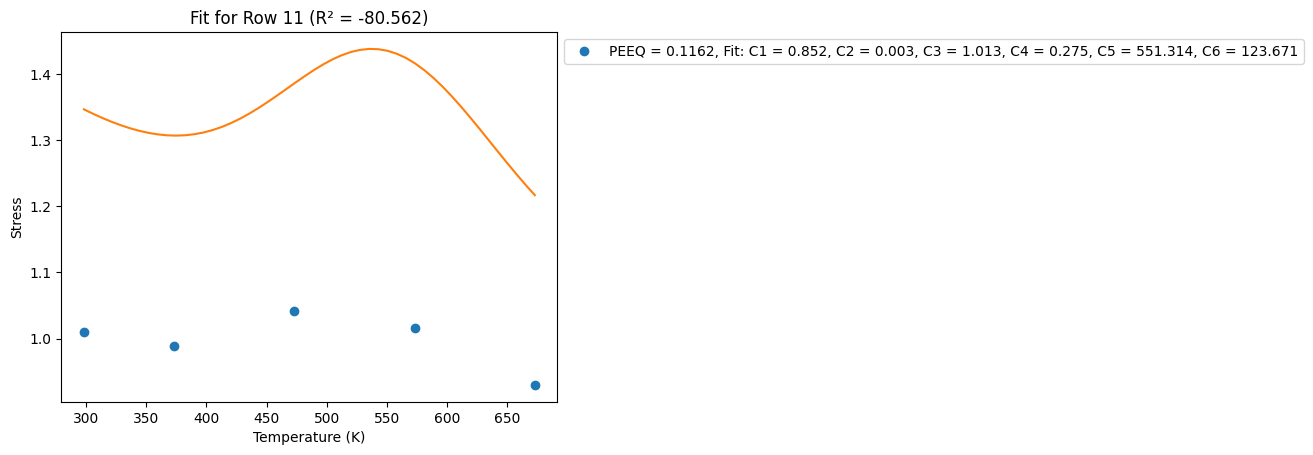

[1.11815168 1.08865993 1.13309312 1.11771852 1.01322897]


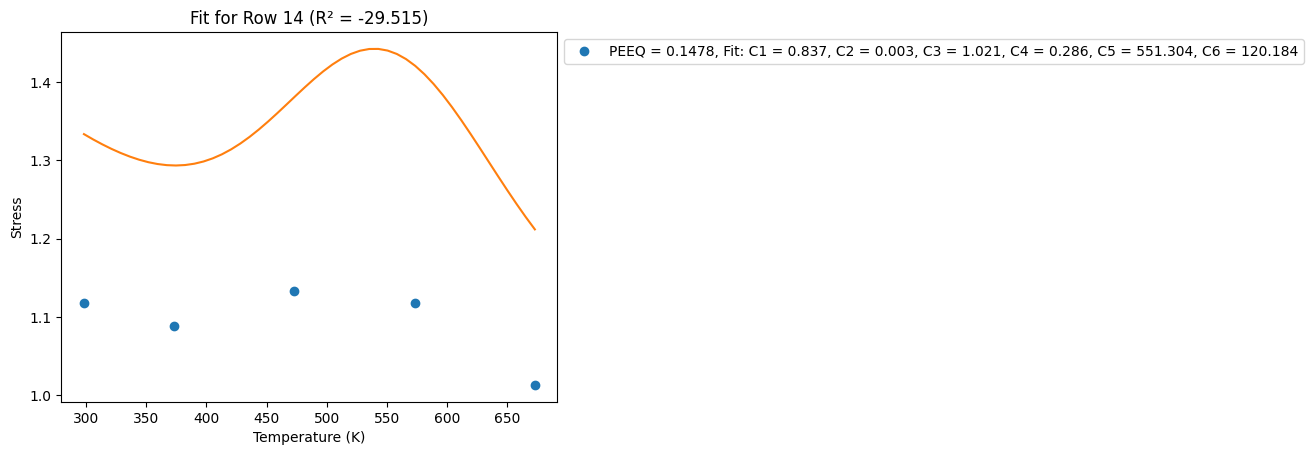

[1.19592986 1.16379901 1.20492475 1.19751757 1.07561931]


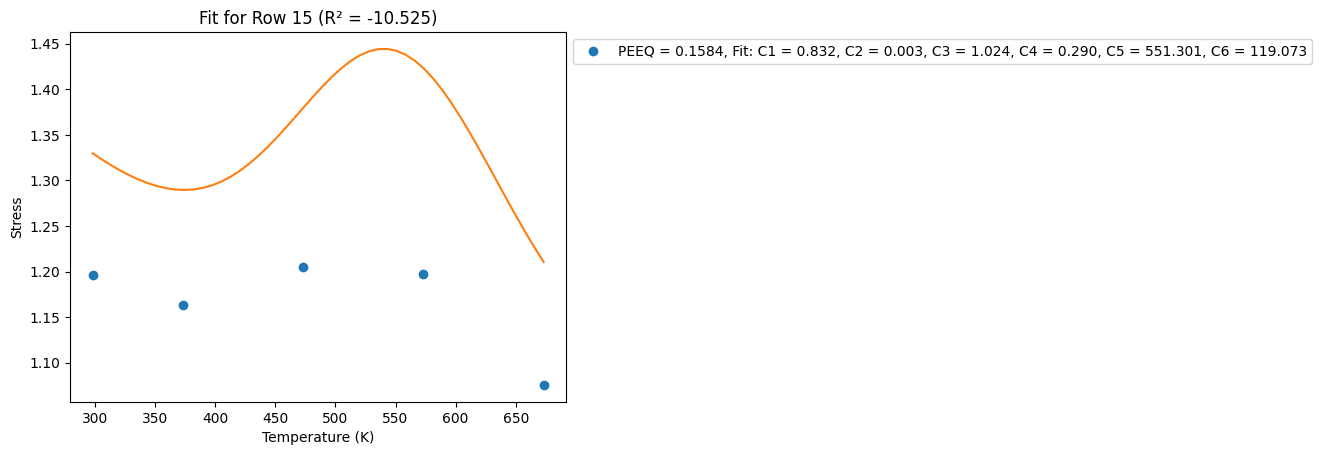

[1.23940505 1.20666763 1.2462144  1.24469802 1.10979872]


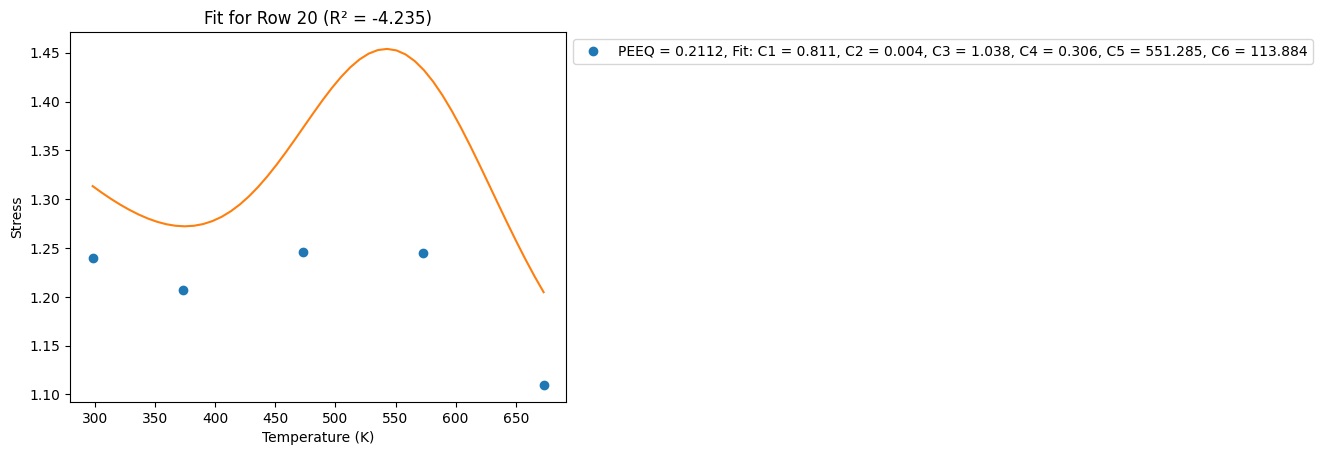

[1.26840748 1.23536332 1.2748874  1.27824723 1.13295314]


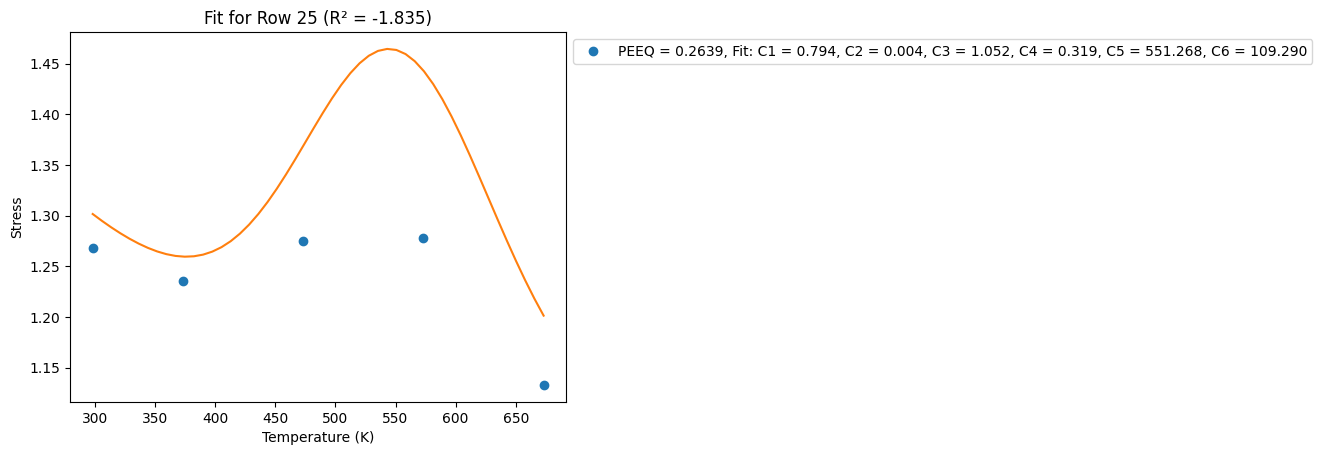

[1.28933018 1.25601087 1.29670201 1.30427379 1.15050424]


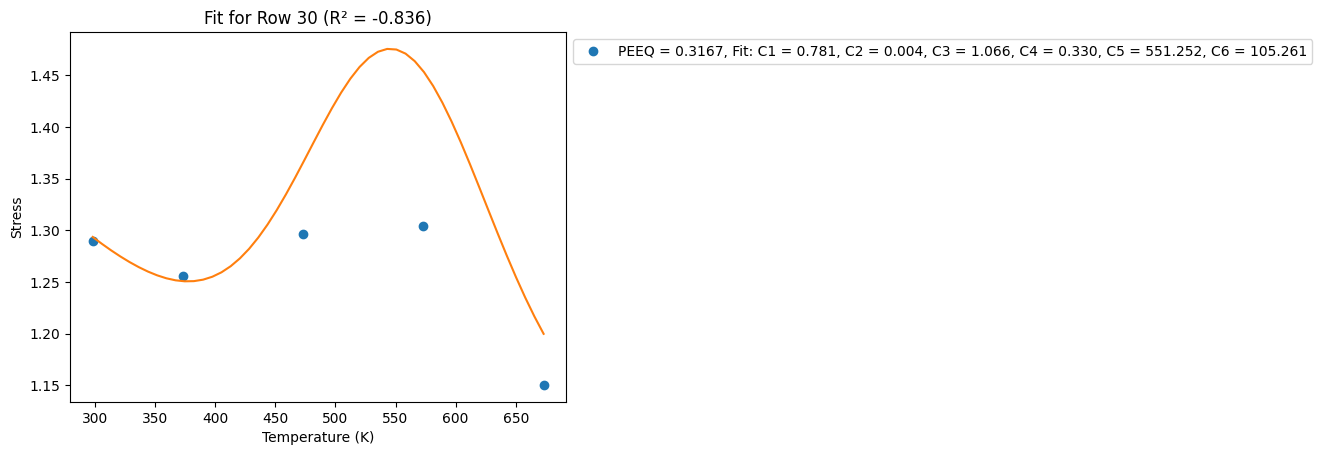

[1.30517576 1.27157692 1.31422587 1.32552702 1.1647031 ]


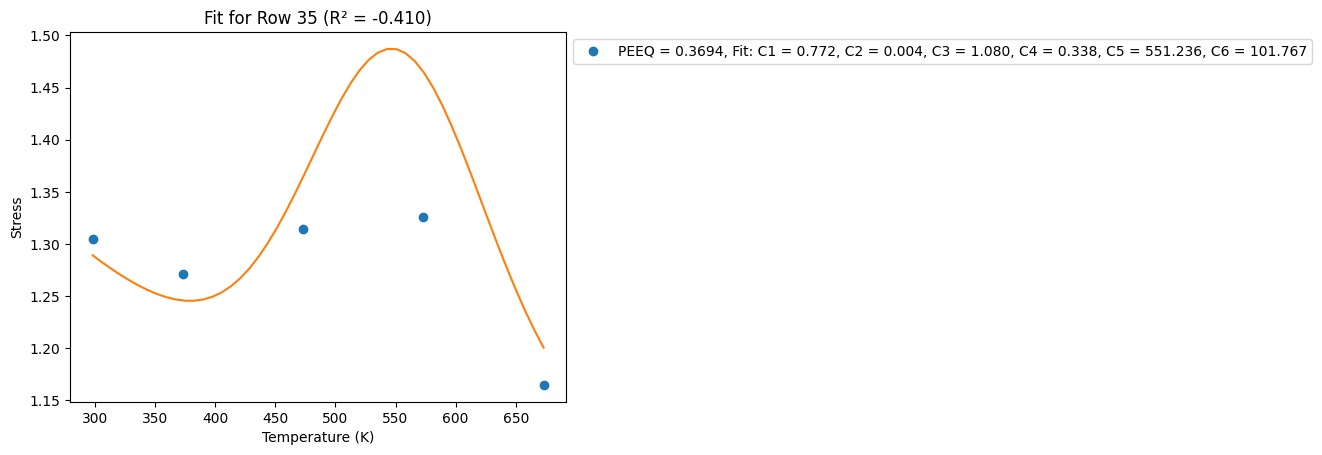

[1.3176175  1.28374258 1.32882186 1.34348129 1.17666112]


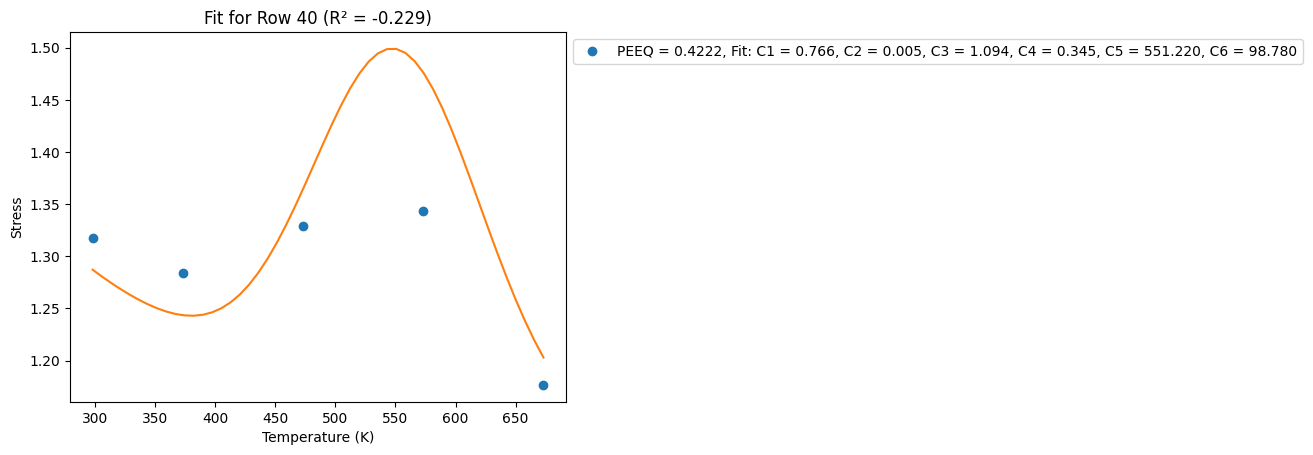

[1.32767831 1.29354256 1.34129787 1.35901934 1.18700462]


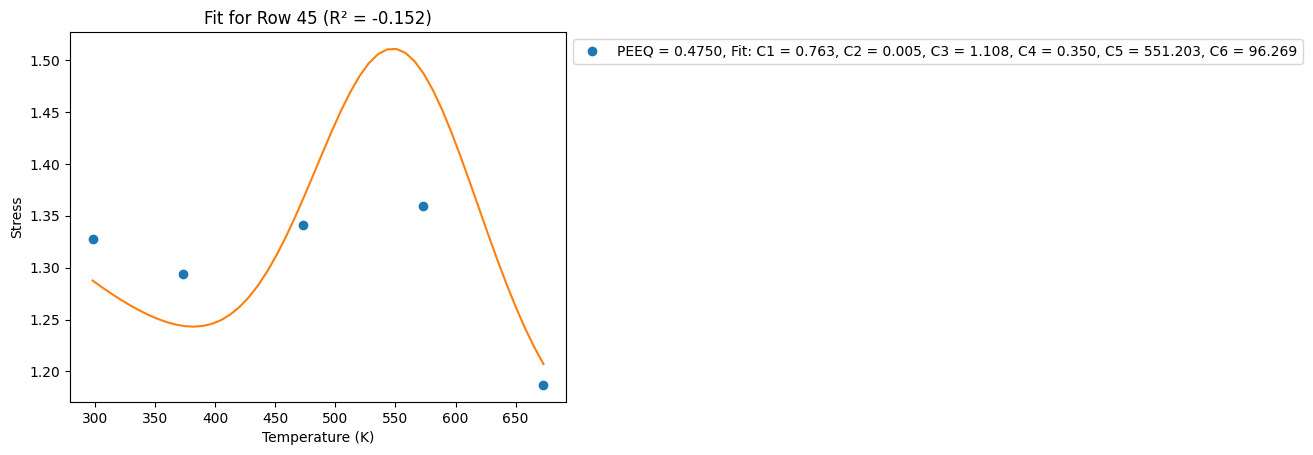

[1.3360197  1.30164609 1.35217109 1.37271159 1.19612375]


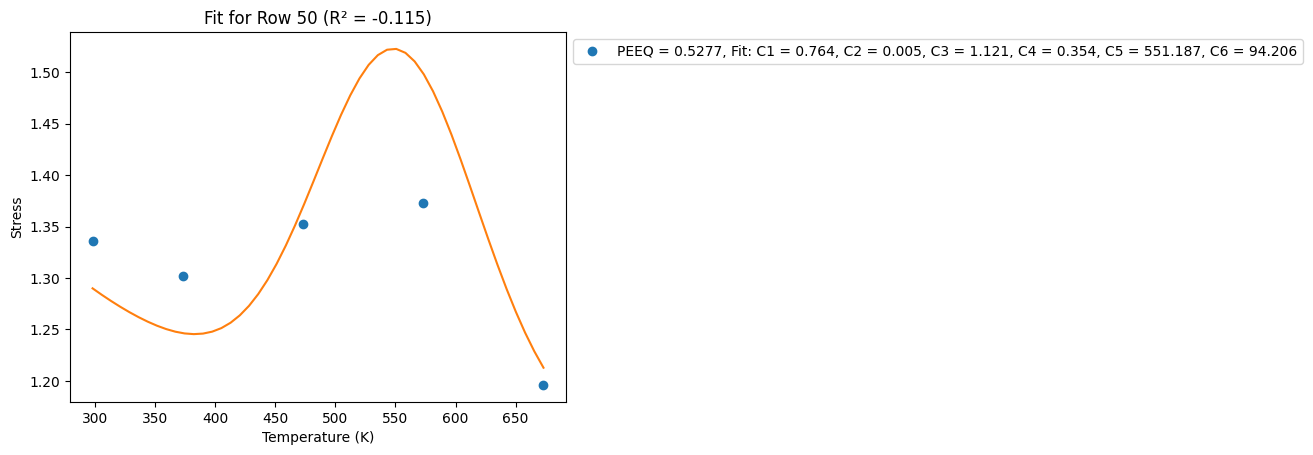

[1.38013537 1.34458104 1.41822106 1.45920431 1.25397195]


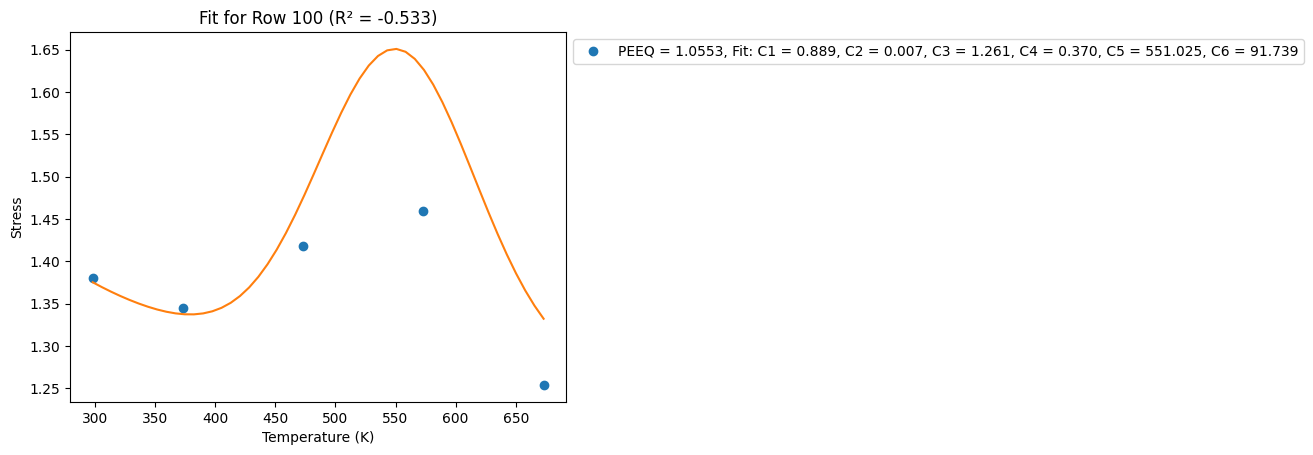

[1.47812567 1.44410535 1.59683583 1.73045775 1.43932906]


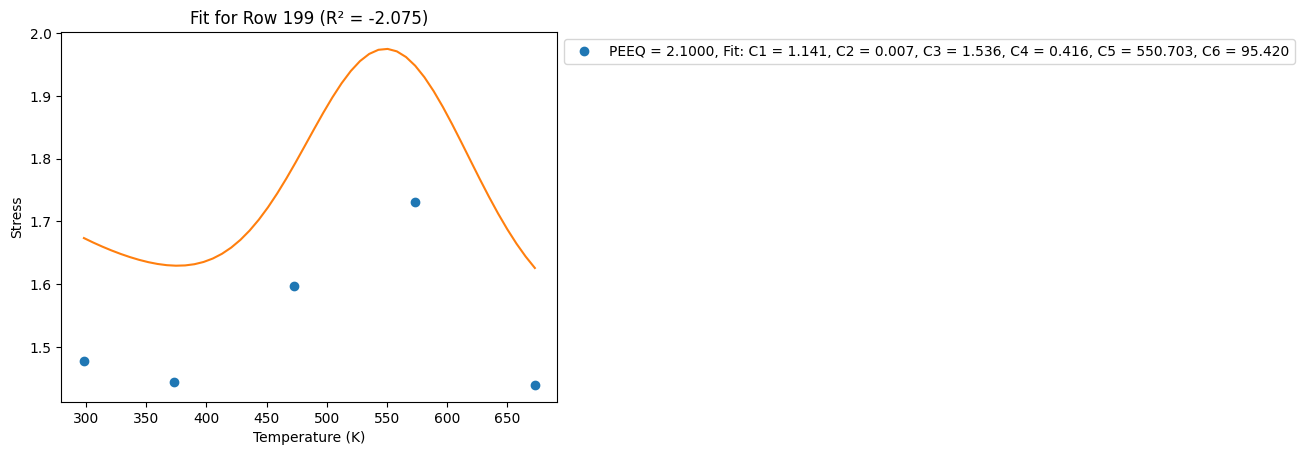

In [557]:
# Temperarute data points
T = np.array([298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 6:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

Load data for StrRt0.01

In [558]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.01.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

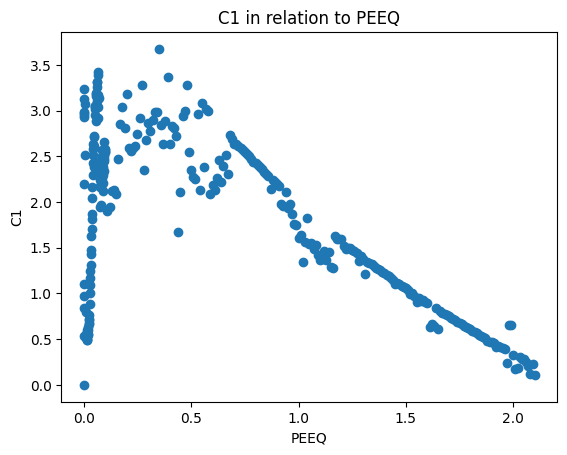

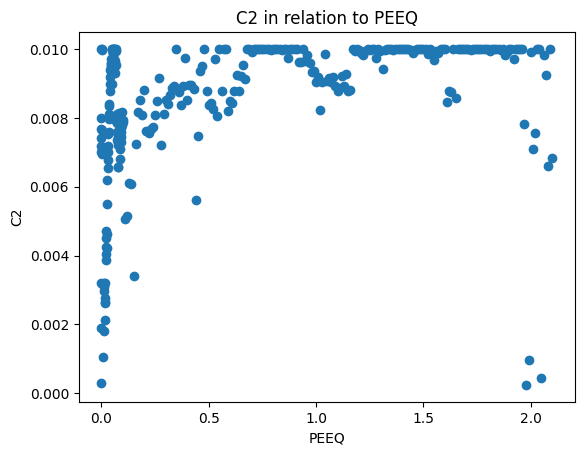

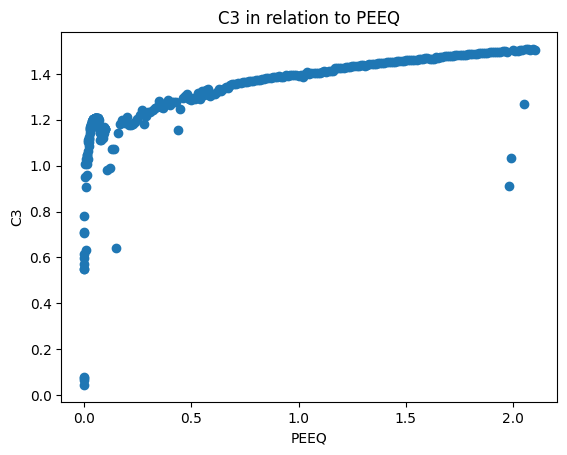

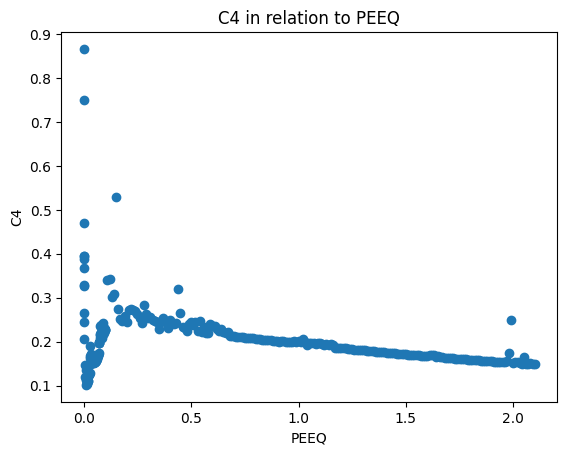

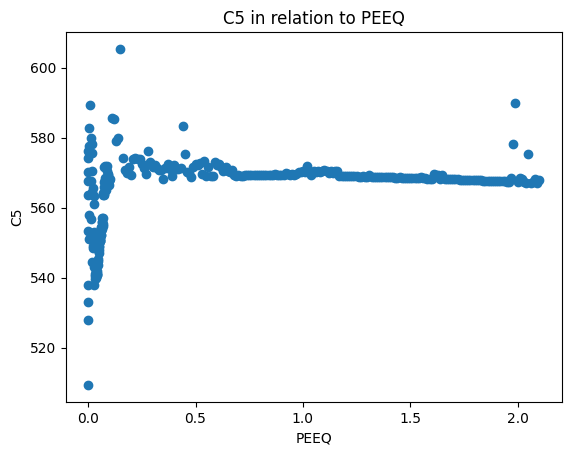

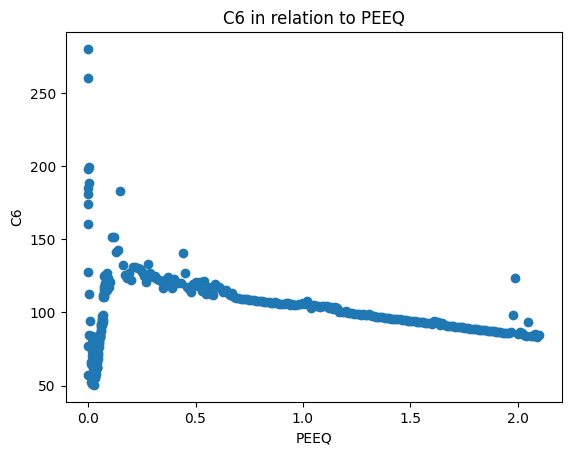

In [559]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

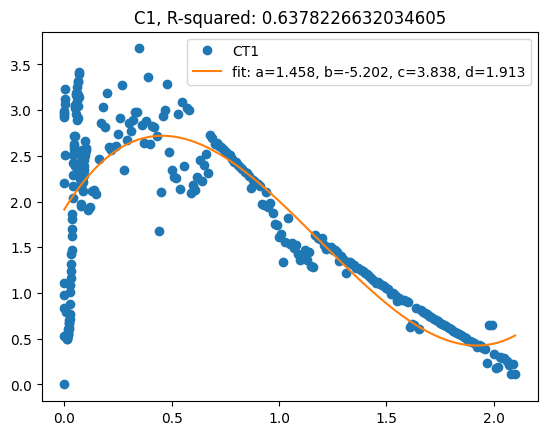

In [560]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [0.1, 0.1, 0.1, np.mean(cT1)]
param_bounds = ([-10, -10, -10, 0], [10, 10, 10, 5])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

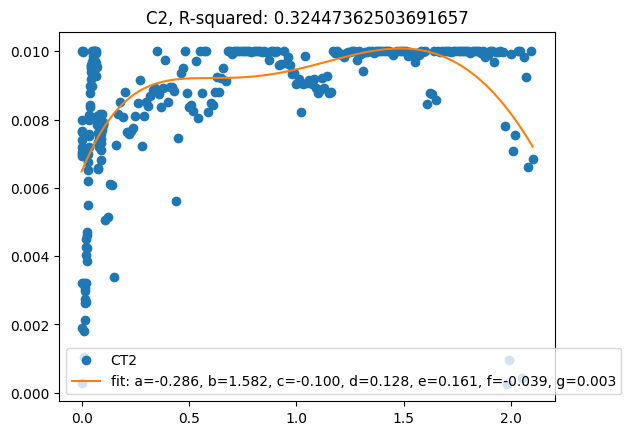

In [561]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f, g)


plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

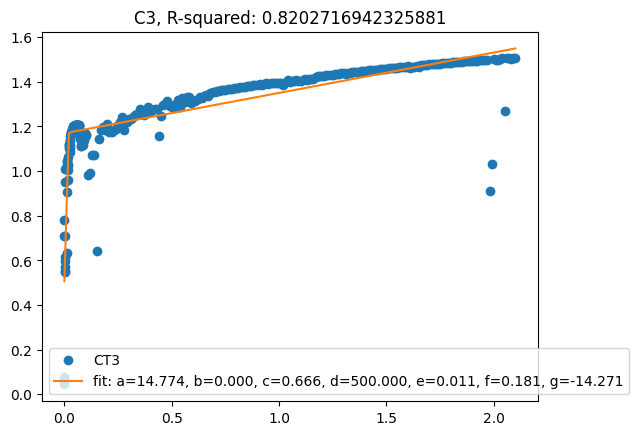

In [562]:
cT3 = data["C3"].to_numpy()
initial_guess = [15, 0.001, 0, 750, 0.02, 0.3, -15]
bounds = ([0, 0, -1, 500, 0, 0, -20], [20, 0.01, 1, 1000, 0.05, 1, 0])

params = curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess,bounds=bounds, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C3, R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

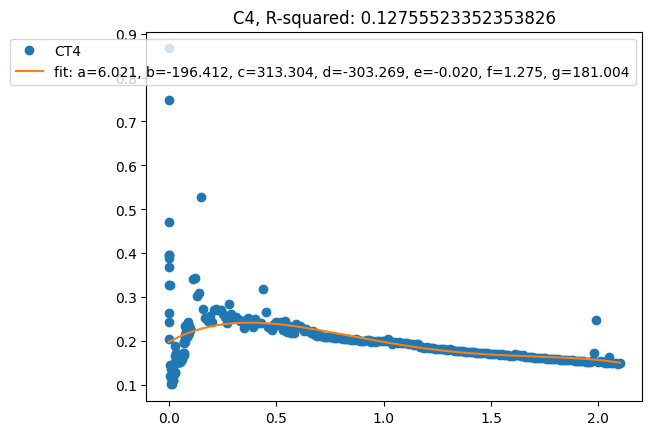

In [563]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C4, R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

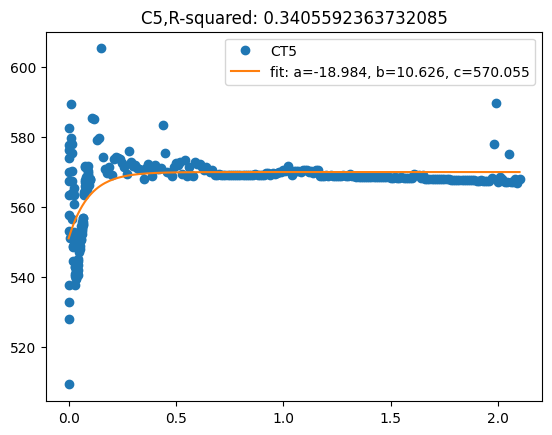

In [564]:
cT5 = data["C5"].to_numpy()
initial_guess = [580, 0.5, 500]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'C5,R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

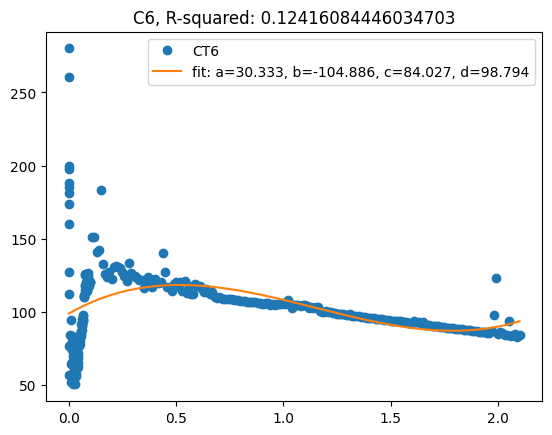

In [565]:
cT6 = data["C6"].to_numpy()
initial_guess = [1, 1, 1, 200]
bounds = ([-1e3, -1e3, -1e3, 0], [1e3, 1e3, 1e3, 1e6])

params = curve_fit(cT6_func, PEEQ, cT6, maxfev=1000000)
[a, b, c, d] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C6, R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [566]:
df_para_fit.to_csv('./para_fit_results_0.01.csv', index=False)

In [567]:

stress_data = pd.read_csv('Fitted_FC_TmpDpn_RD_StrRt0.01_ref.csv')

fitted_para = pd.read_csv('para_fit_results_0.01.csv')

[0.35395648 0.71718437 0.73340246 0.84894449 0.44089025]


C:\Users\socca\AppData\Local\Temp\ipykernel_37396\3597178534.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


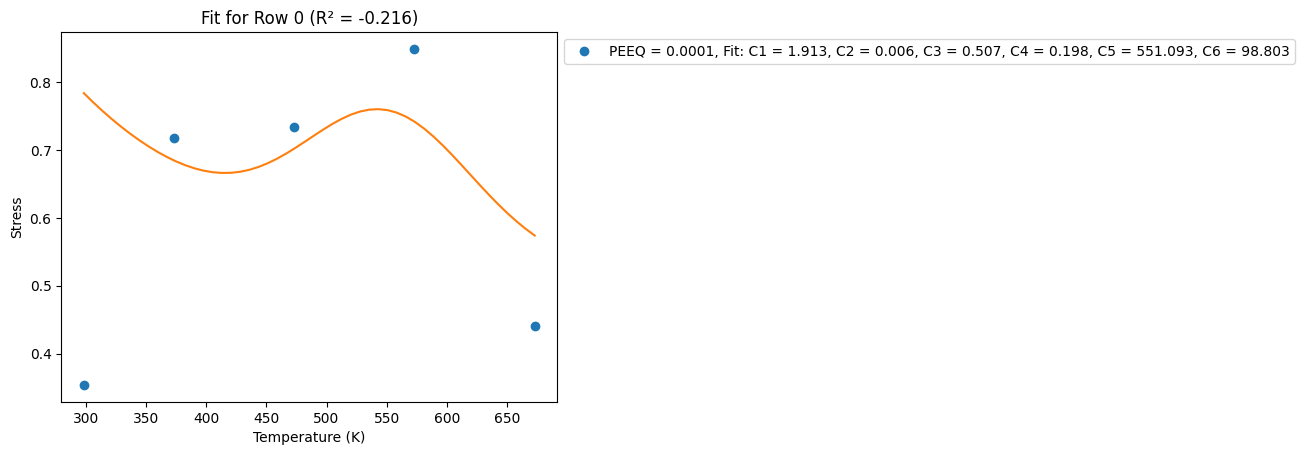

[0.43959847 0.79587036 0.82125822 0.89382005 0.61976902]


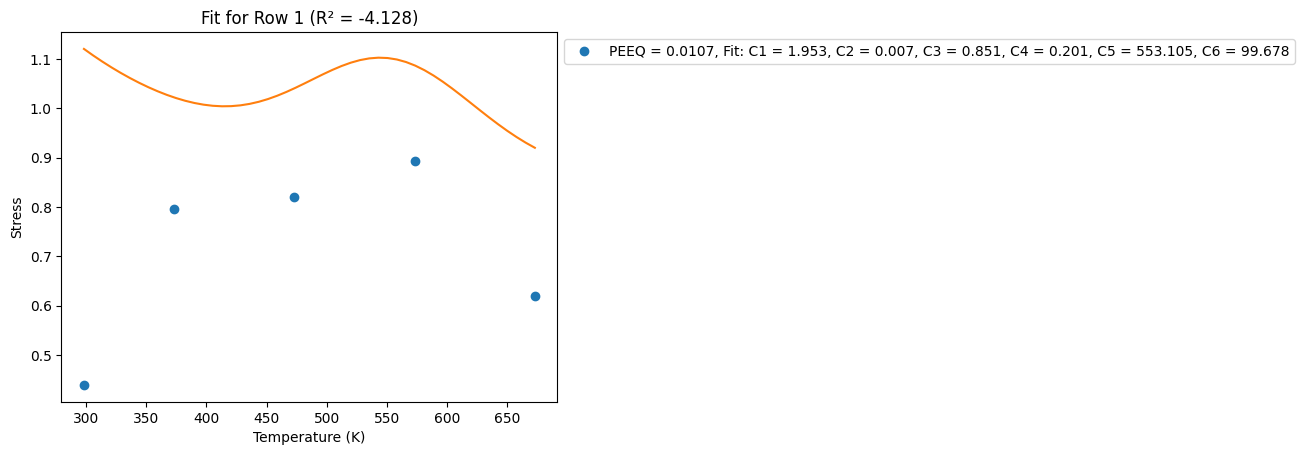

[0.63840811 0.80999341 0.85334548 0.91657997 0.68249243]


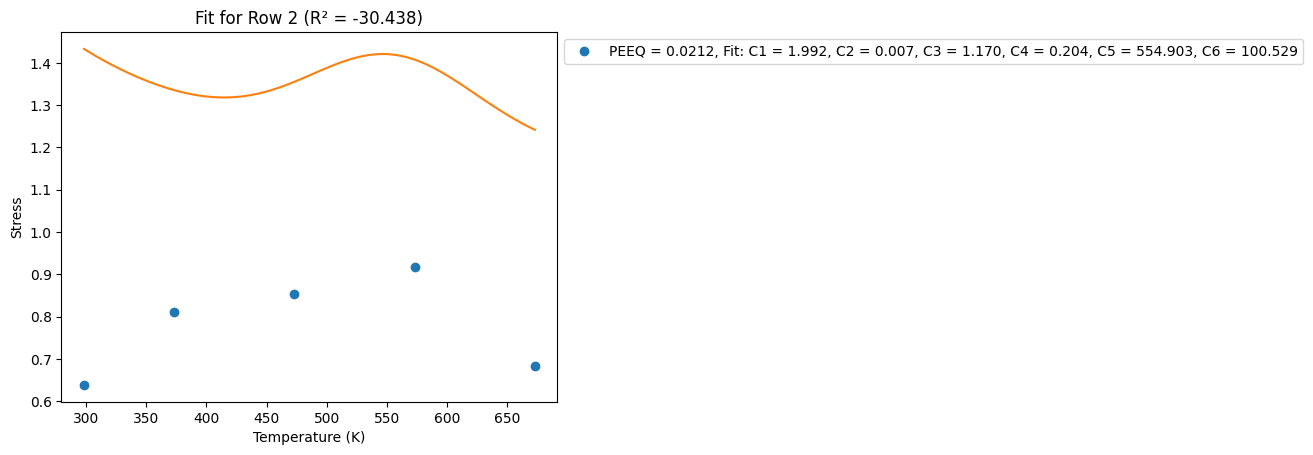

[0.76716947 0.82243453 0.8773876  0.93463498 0.73063929]


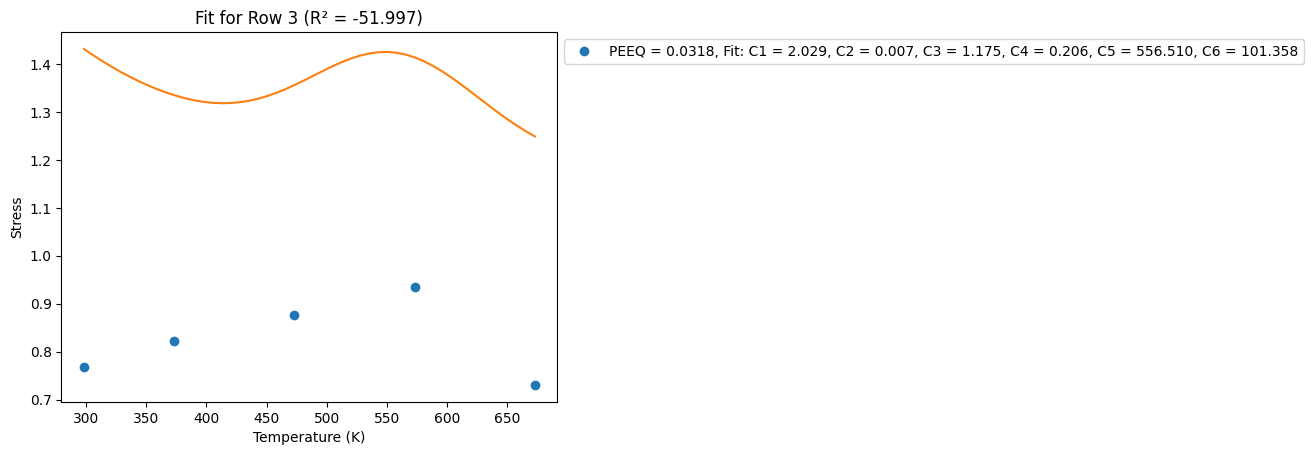

[0.84175786 0.83320907 0.8953506  0.9482615  0.76669728]


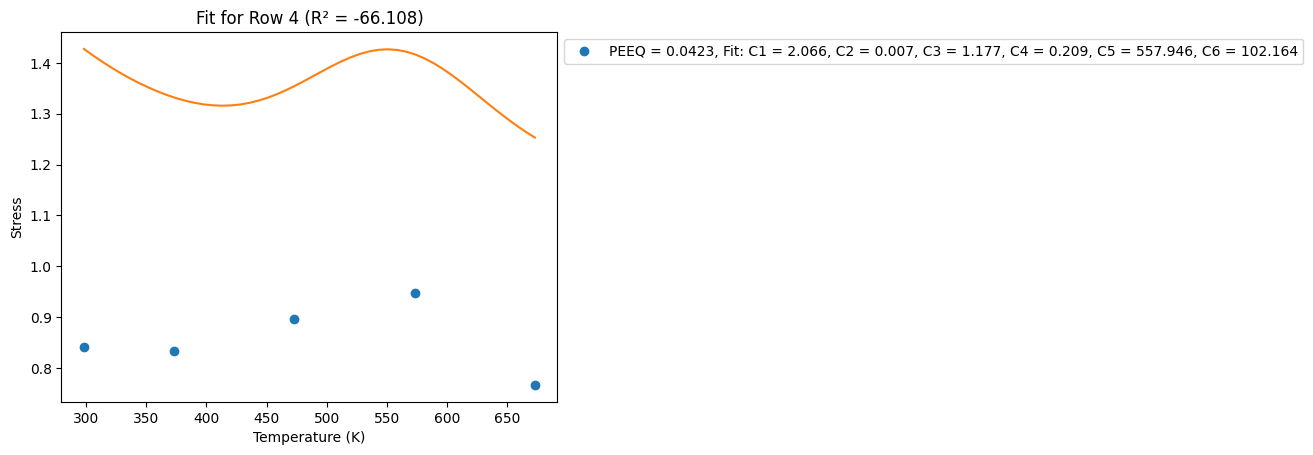

[0.88667724 0.84297027 0.90973696 0.95915286 0.79508988]


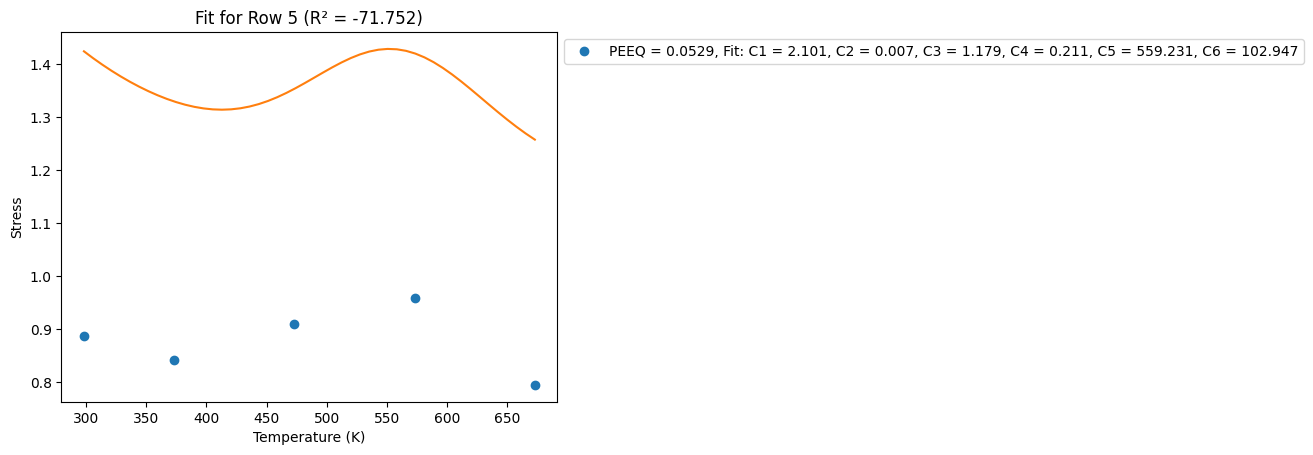

[0.91525036 0.8520262  0.92176414 0.96825508 0.81812719]


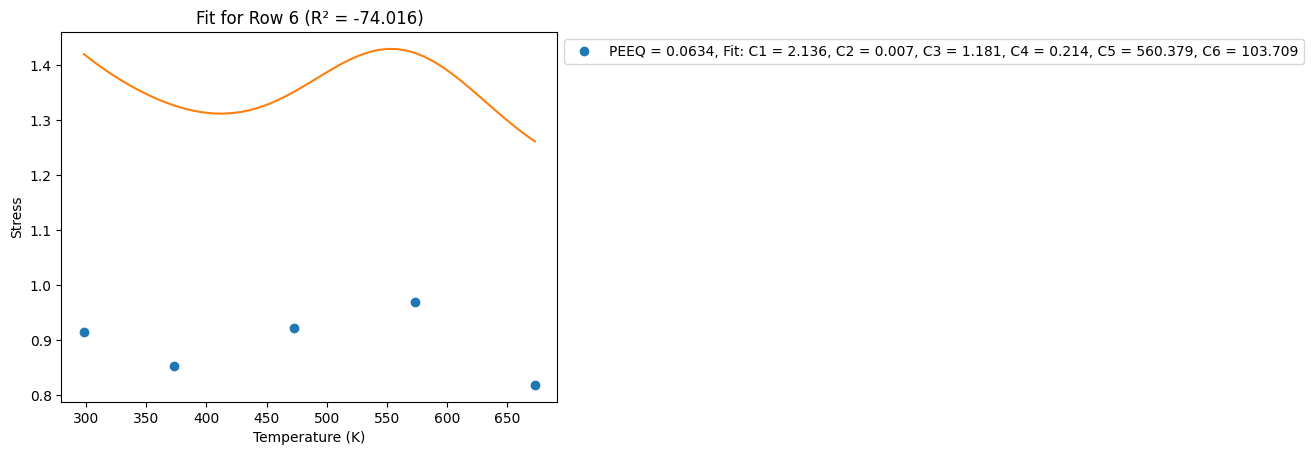

[0.97001281 0.88382475 0.95671045 0.99545736 0.87895781]


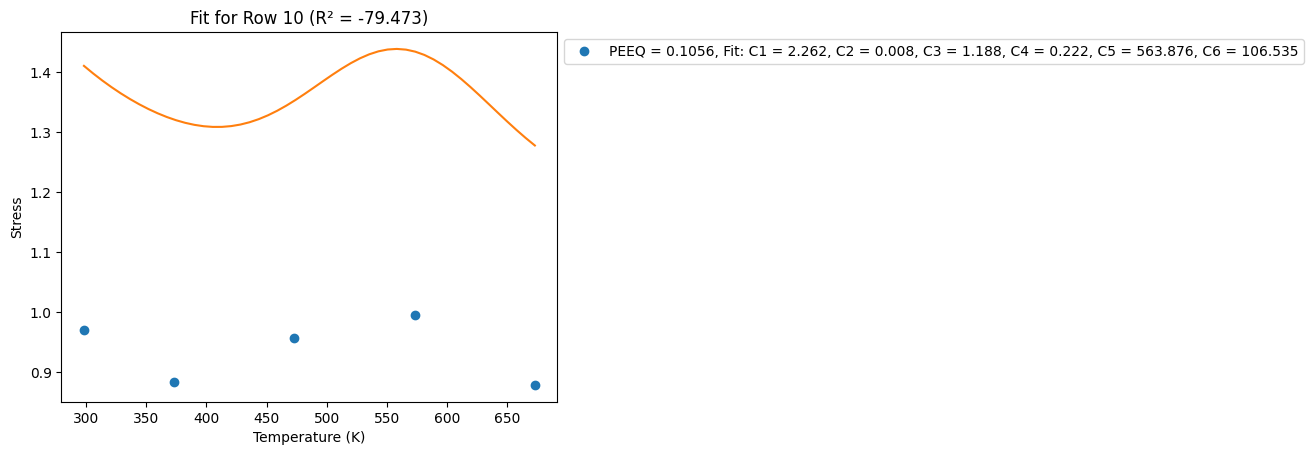

[1.03450811 0.94682016 1.00724667 1.04214408 0.94757195]


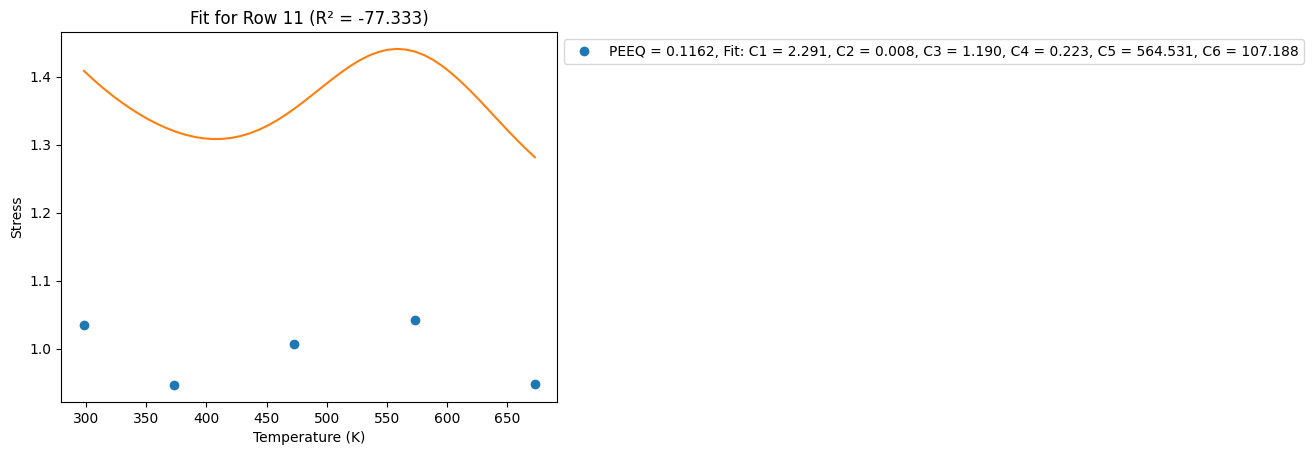

[1.13550081 1.06965551 1.0813155  1.12823447 1.02590483]


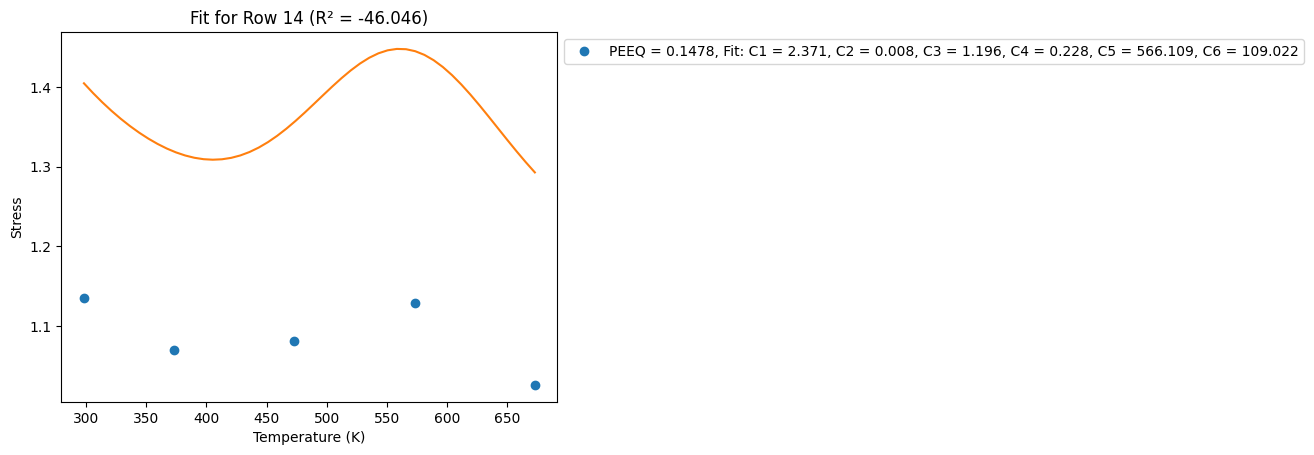

[1.21328749 1.16999171 1.14449695 1.19895034 1.08457847]


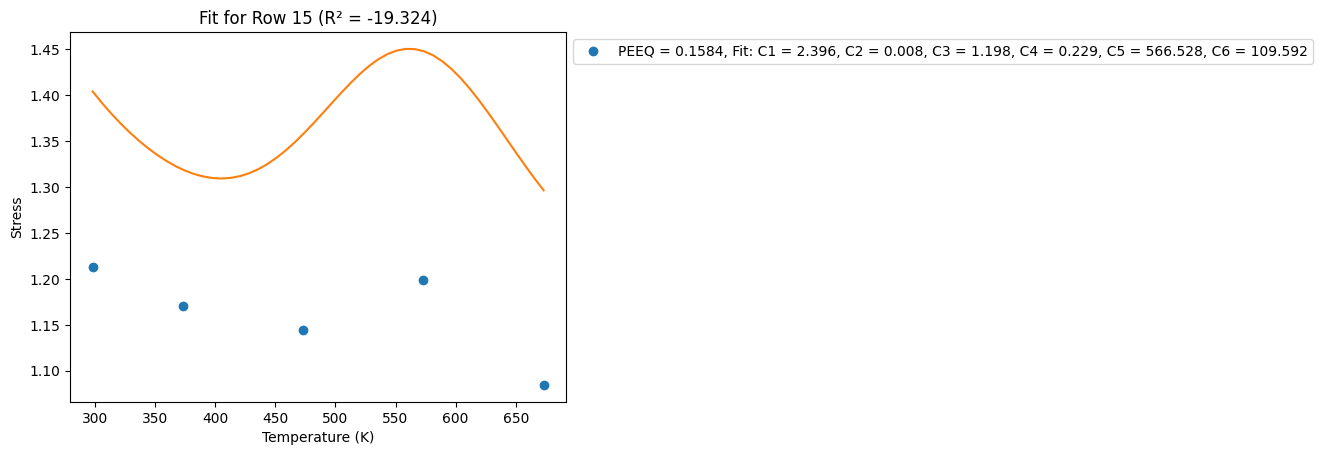

[1.25569601 1.21439984 1.18388844 1.23941293 1.11895021]


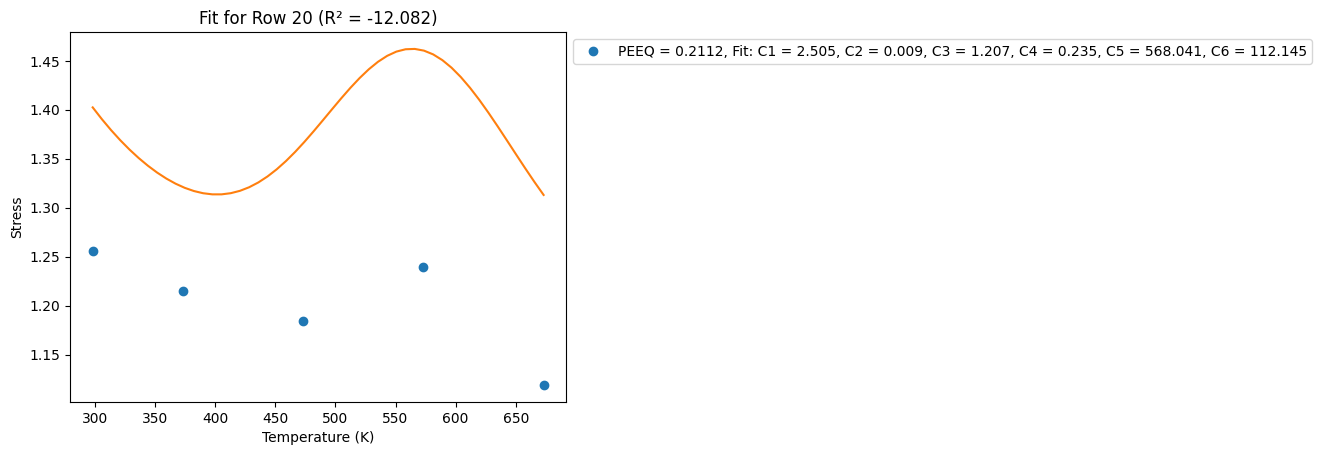

[1.28376537 1.23662194 1.2121032  1.26758456 1.14335171]


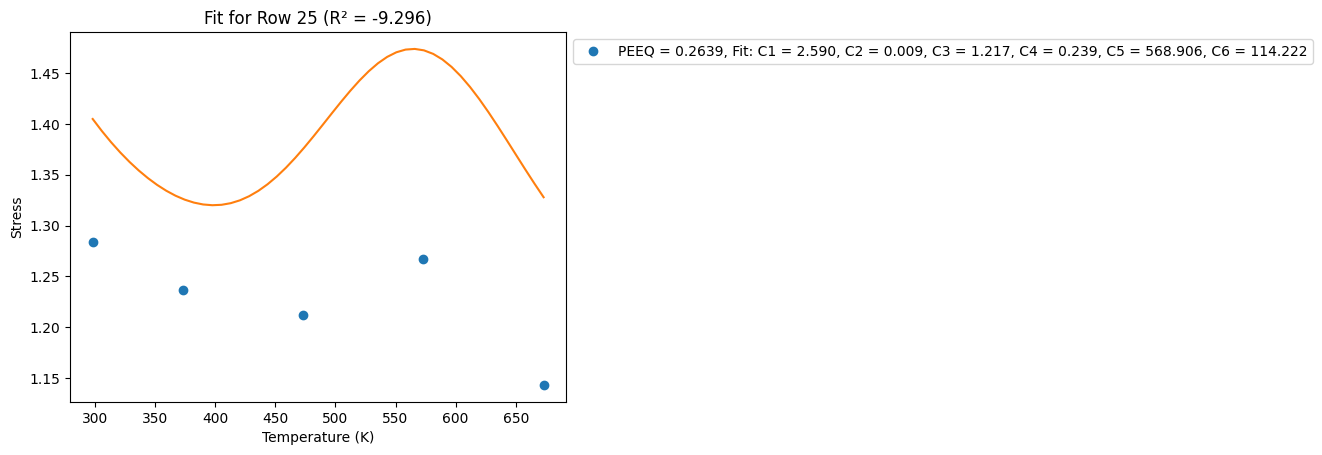

[1.30426768 1.24958794 1.23360336 1.28911346 1.16228516]


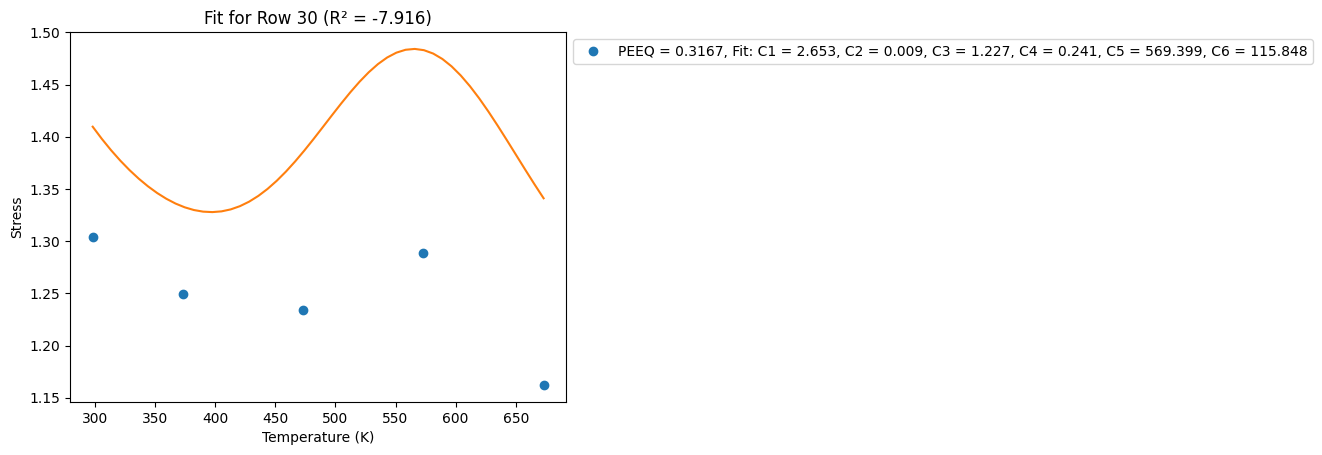

[1.32017153 1.25843862 1.2506256  1.30648978 1.17775815]


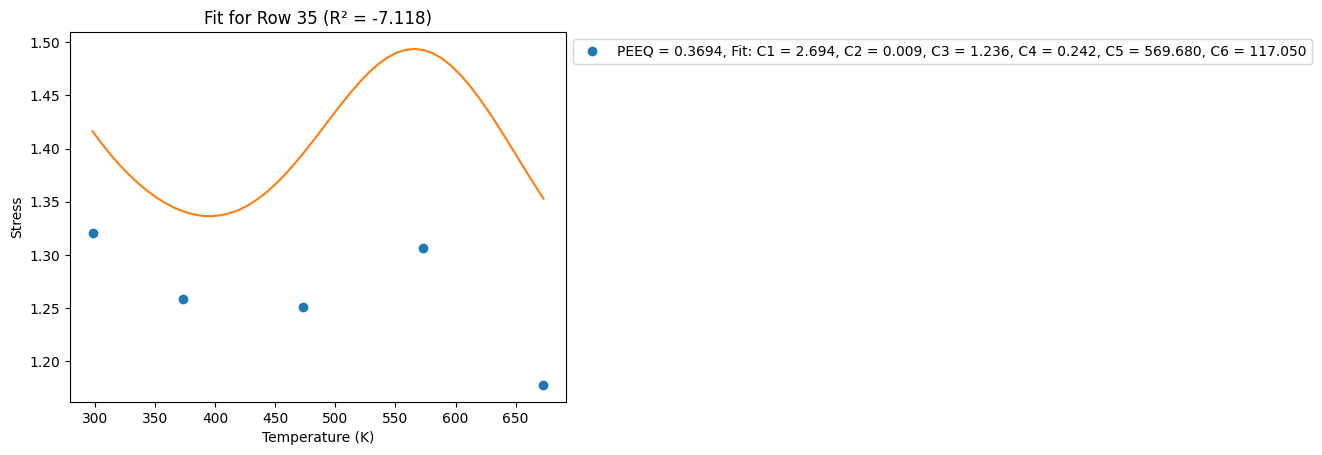

[1.33302062 1.26528083 1.26448812 1.32102928 1.1908423 ]


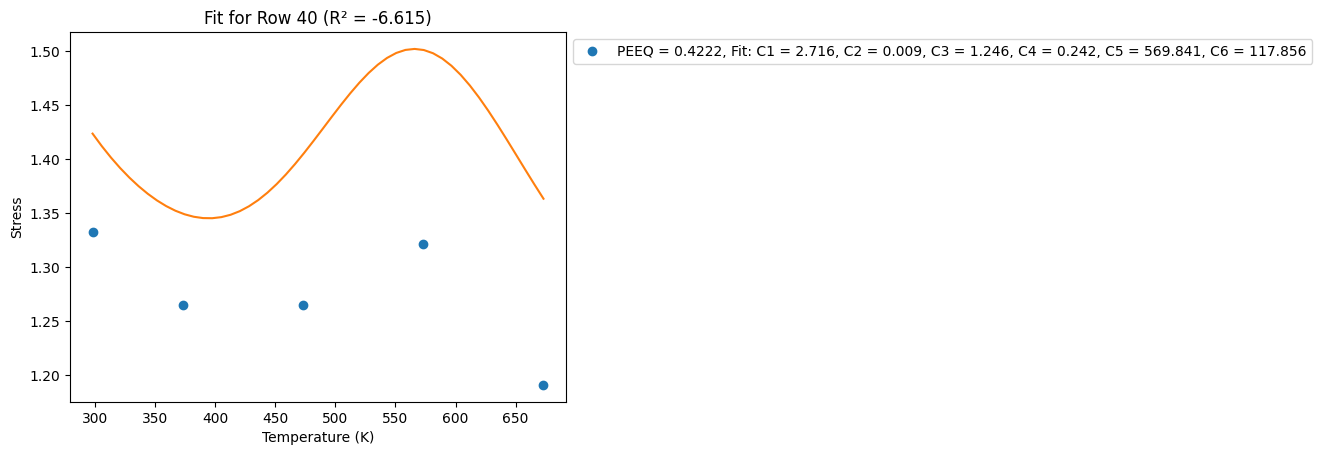

[1.34371134 1.27101548 1.27603953 1.33351072 1.20217756]


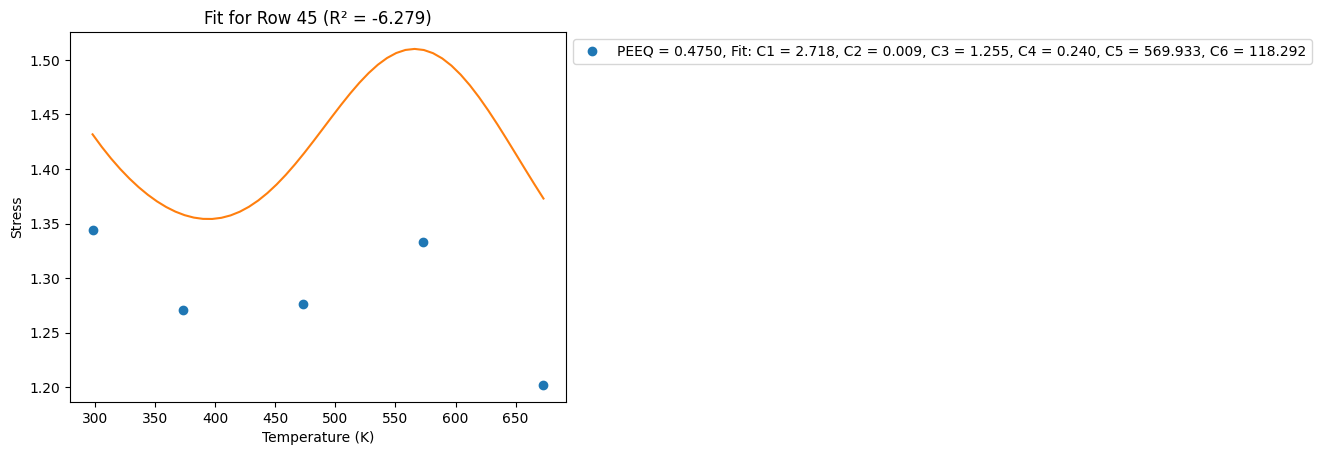

[1.35280632 1.27605336 1.28585599 1.34443258 1.21217682]


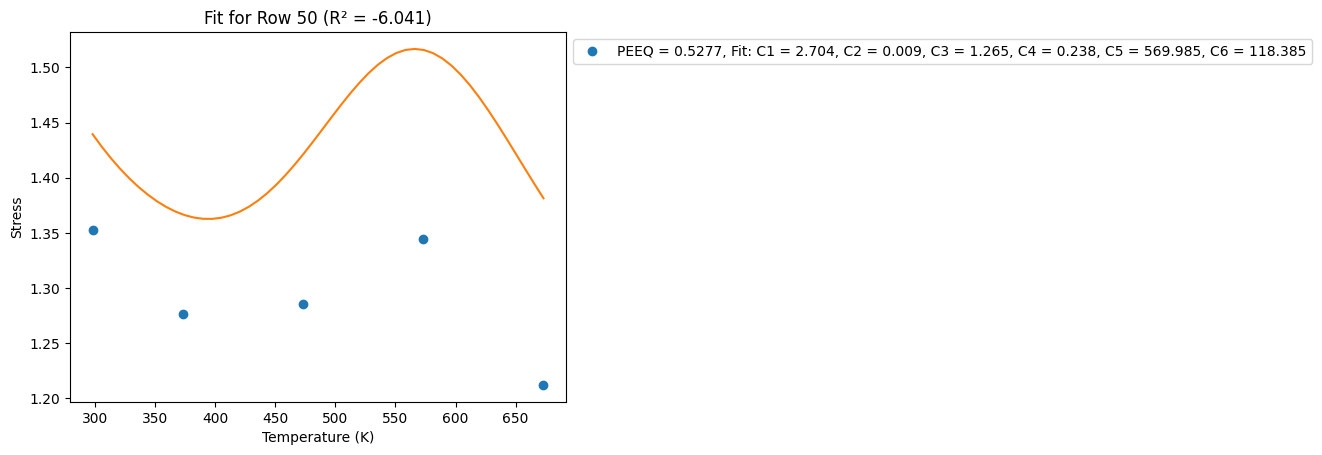

[1.40354559 1.31009324 1.34140566 1.41180891 1.27562644]


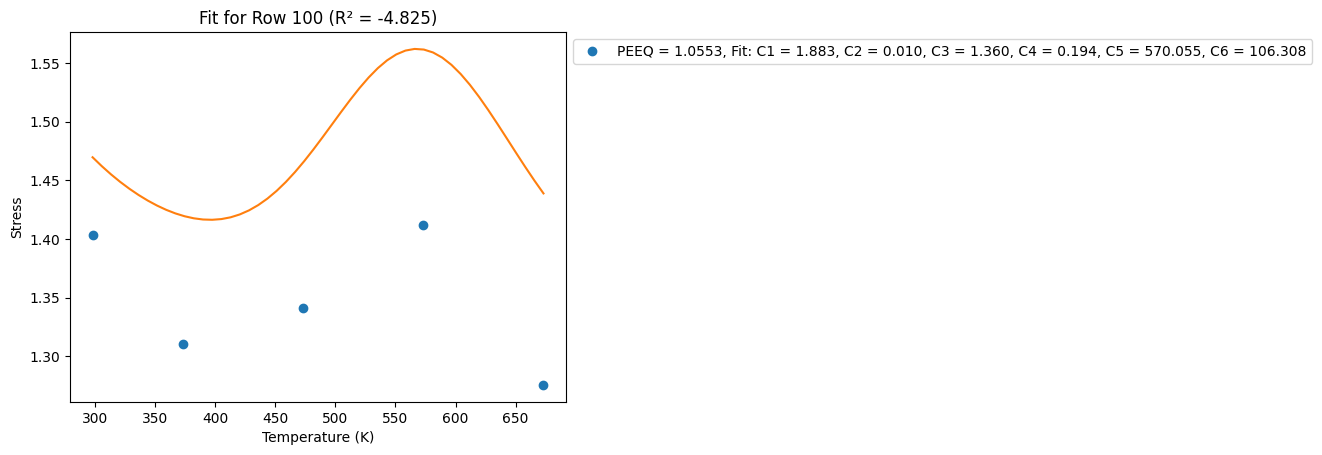

[1.50333908 1.45762935 1.50475046 1.60619641 1.47892478]


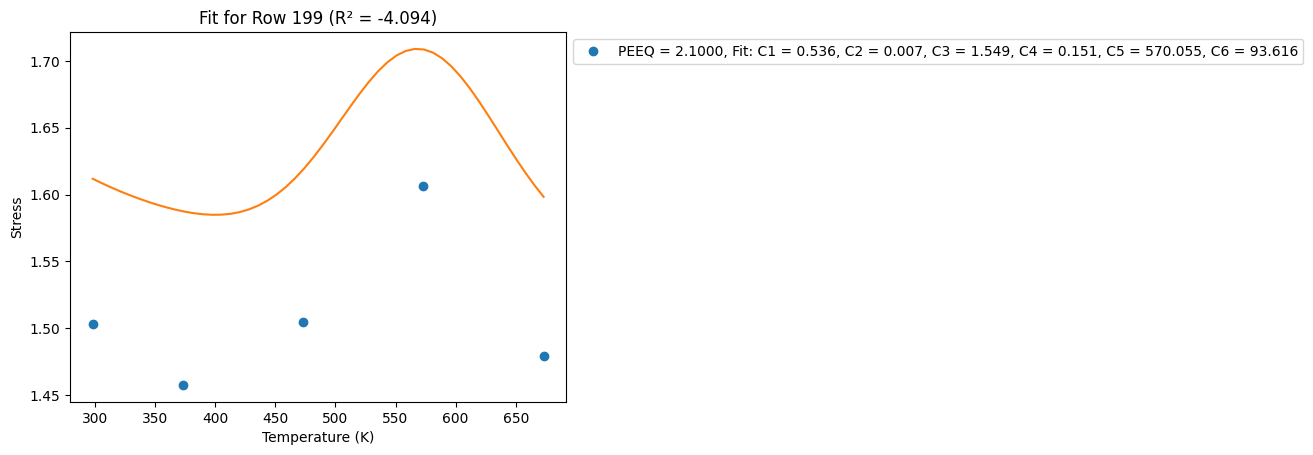

In [568]:
# Temperarute data points
T = np.array([298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 6:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

Load data for StrRt0.1

In [569]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.1.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

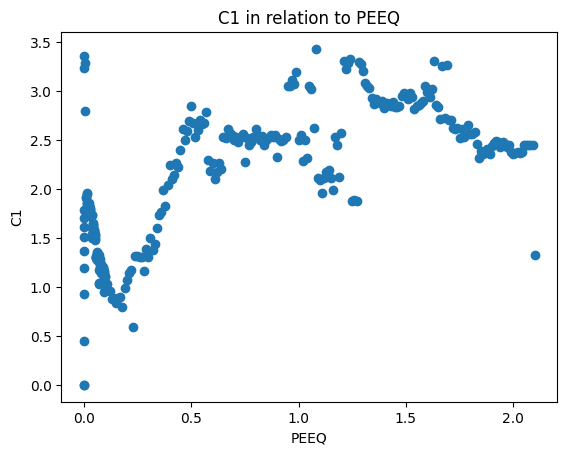

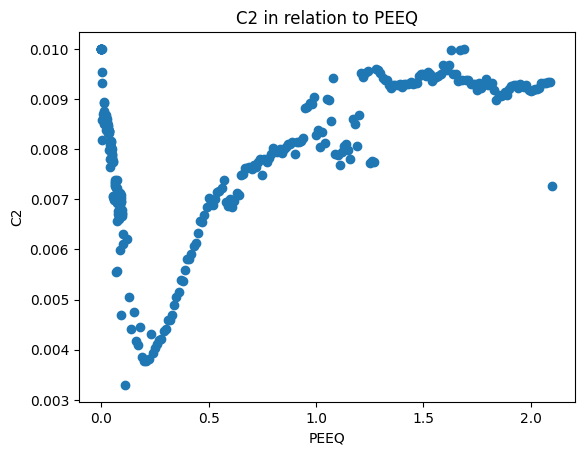

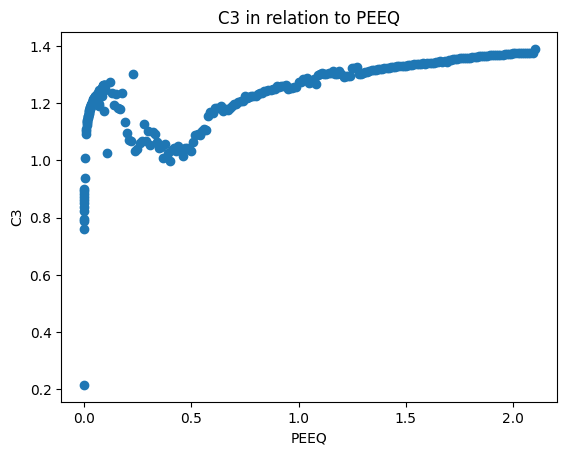

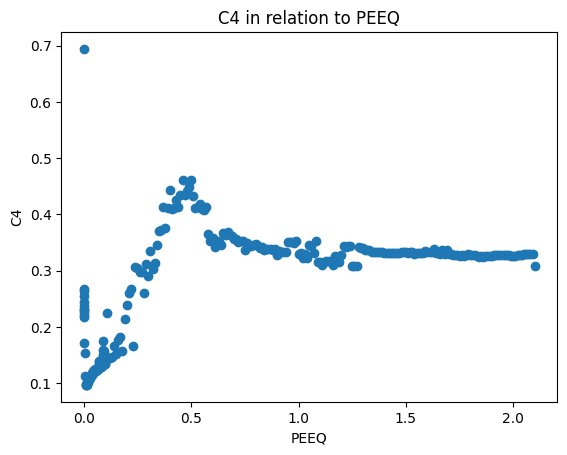

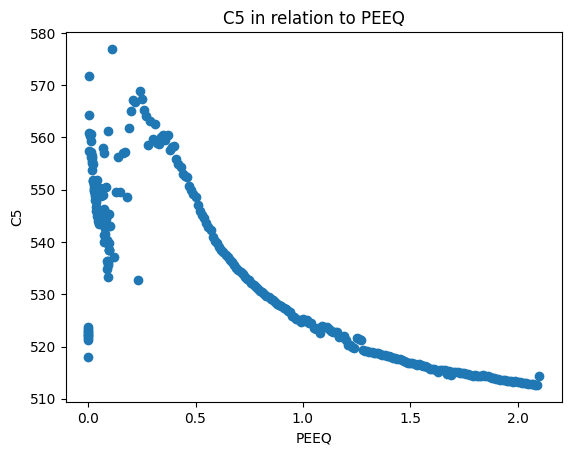

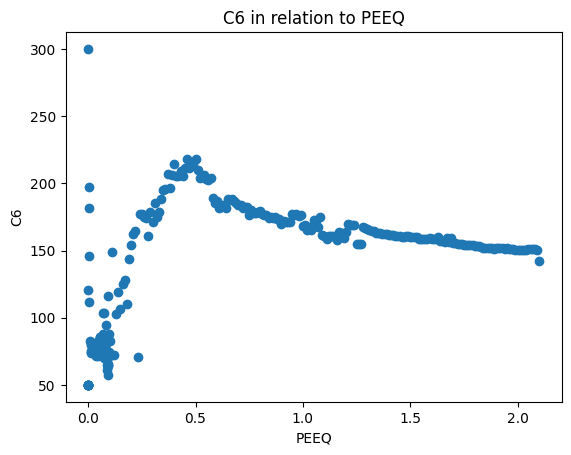

In [570]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

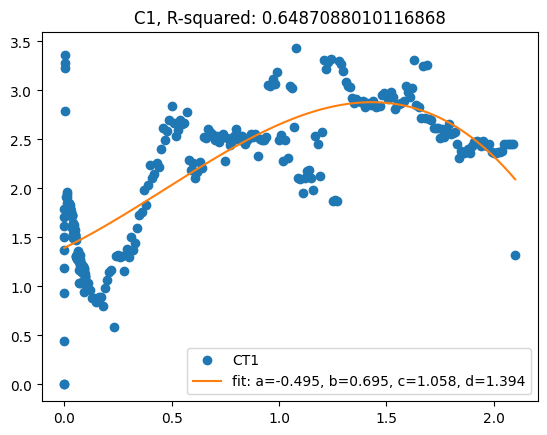

In [571]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [1, 1, 1, 1]
param_bounds = ([-10, -10, -10, -10], [10, 10, 10, 10])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

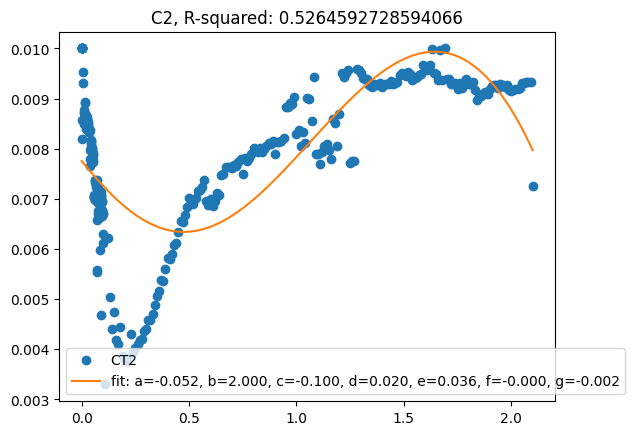

In [572]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f, g)


plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

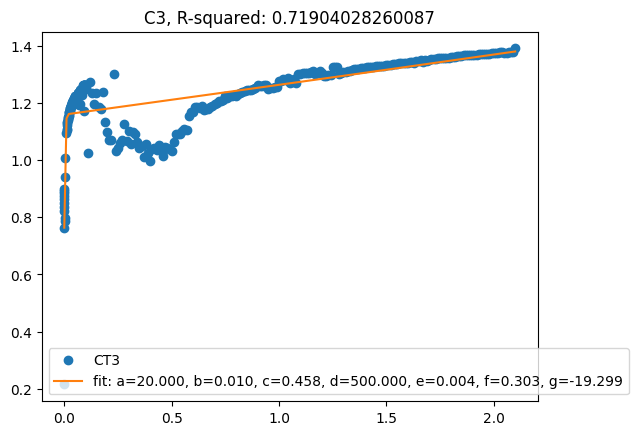

In [573]:
cT3 = data["C3"].to_numpy()
initial_guess = [15, 0.001, 0, 750, 0.02, 0.3, -15]
bounds = ([0, 0, -1, 500, 0, 0, -20], [20, 0.01, 1, 1000, 0.05, 1, 0])

params = curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess,bounds=bounds, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C3, R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

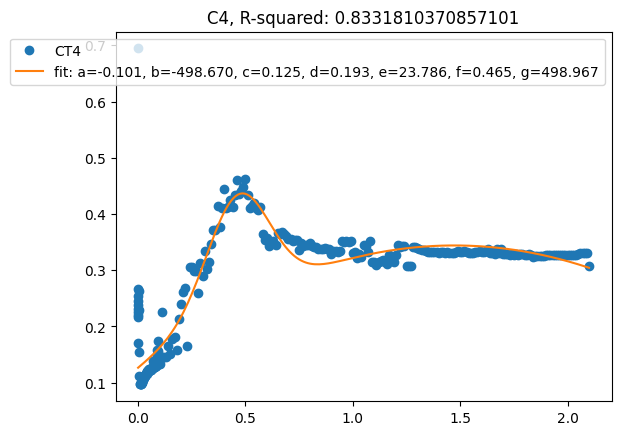

In [574]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C4, R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

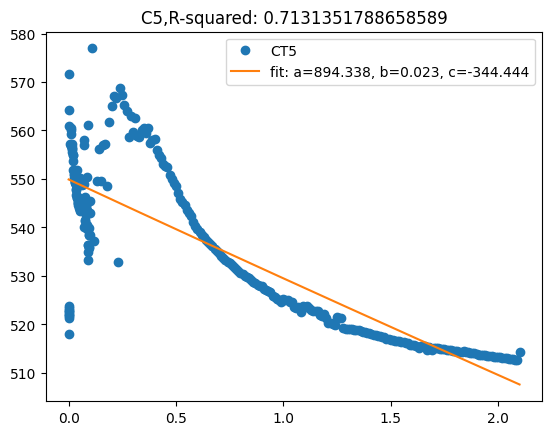

In [575]:
cT5 = data["C5"].to_numpy()
initial_guess = [580, 0.5, 500]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'C5,R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

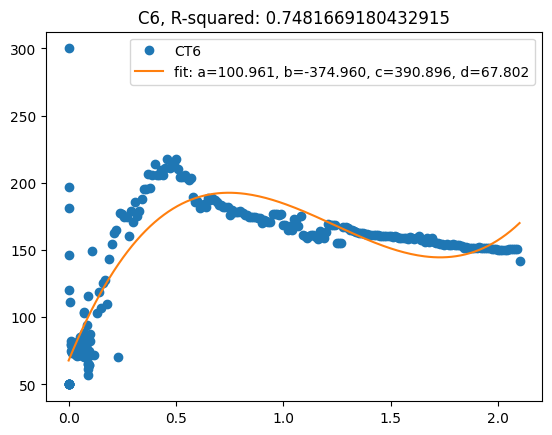

In [576]:
cT6 = data["C6"].to_numpy()
initial_guess = [1, 1, 1, 200]
bounds = ([-1e3, -1e3, -1e3, 0], [1e3, 1e3, 1e3, 1e6])

params = curve_fit(cT6_func, PEEQ, cT6, maxfev=1000000)
[a, b, c, d] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C6, R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [577]:
df_para_fit.to_csv('./para_fit_results_0.1.csv', index=False)

In [578]:
stress_data = pd.read_csv('Fitted_FC_TmpDpn_RD_StrRt0.1_ref.csv')

fitted_para = pd.read_csv('para_fit_results_0.1.csv')

[0.4815976  0.68646466 0.85342074 0.84650807 0.65395481]


C:\Users\socca\AppData\Local\Temp\ipykernel_37396\3597178534.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


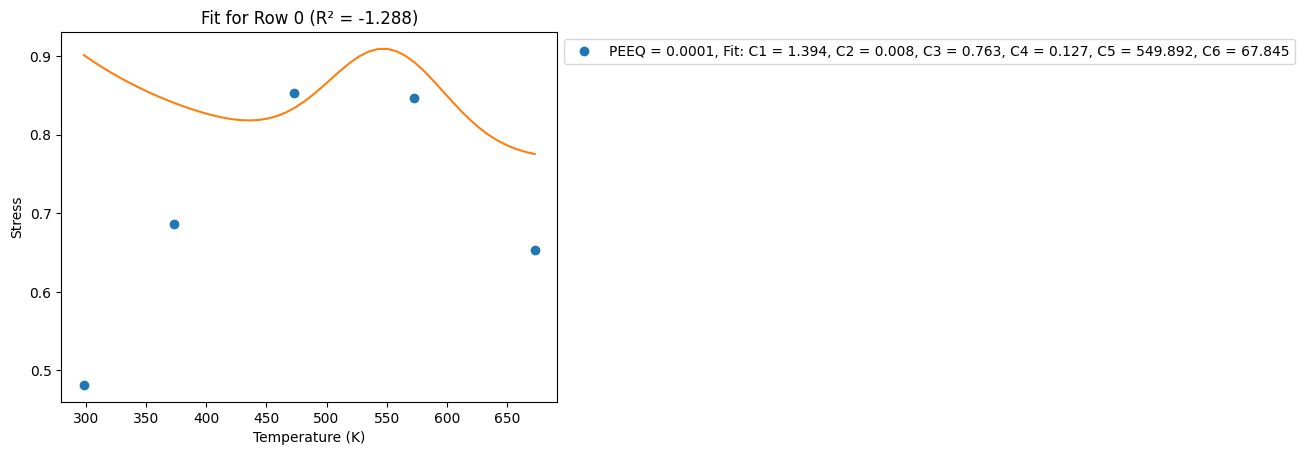

[0.6011466  0.76438934 0.89351264 0.87806465 0.76432483]


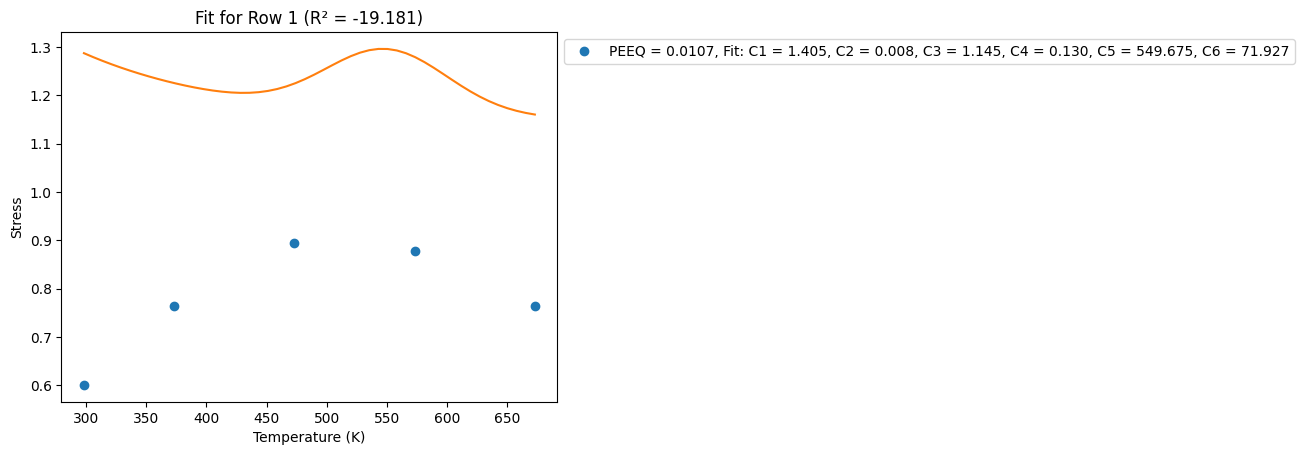

[0.76667804 0.79851582 0.91405386 0.89700229 0.79970874]


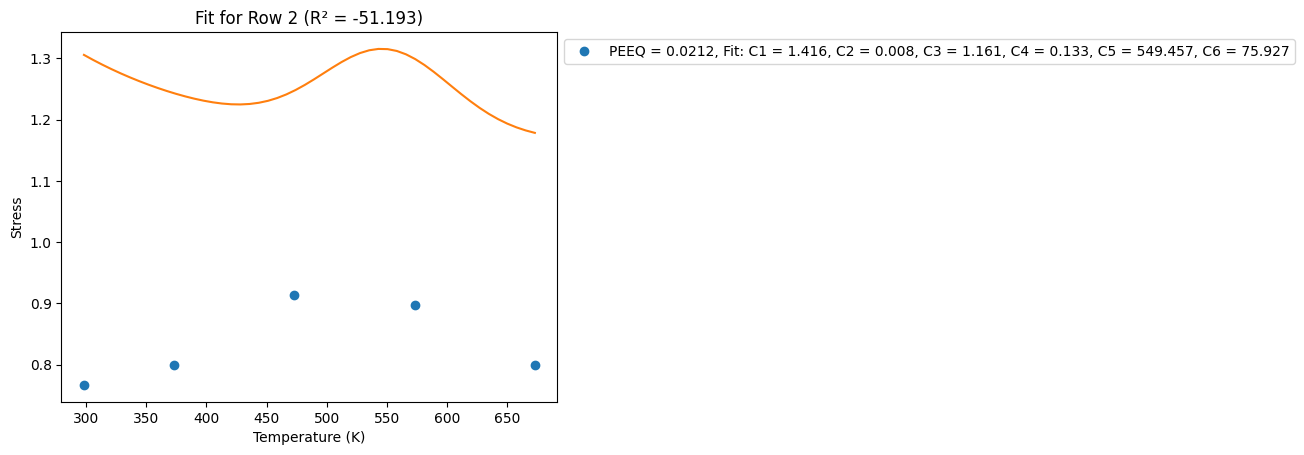

[0.8473169  0.82563816 0.93115484 0.91400163 0.82576349]


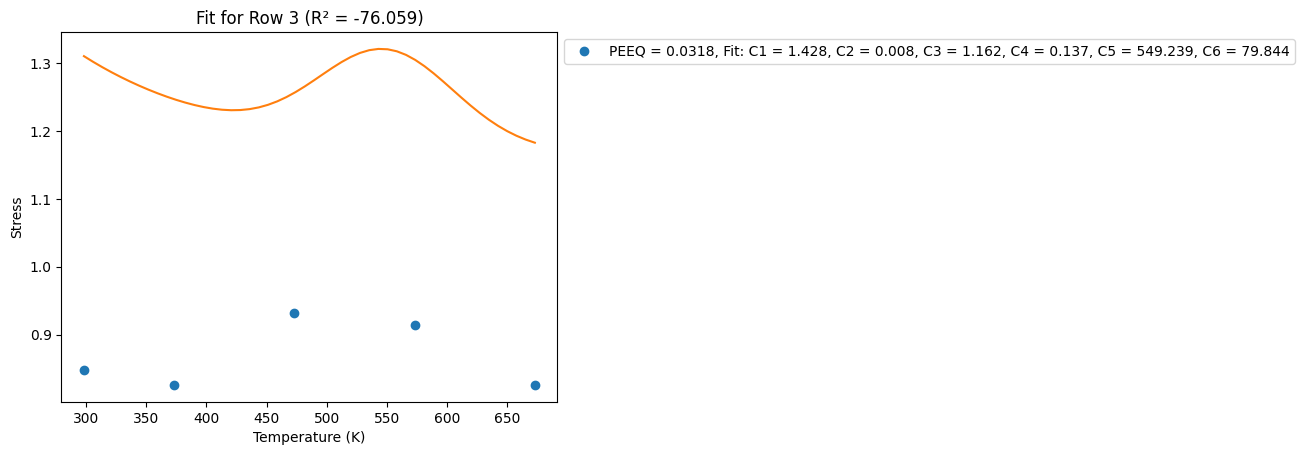

[0.89006813 0.8467169  0.94473053 0.92822303 0.84514751]


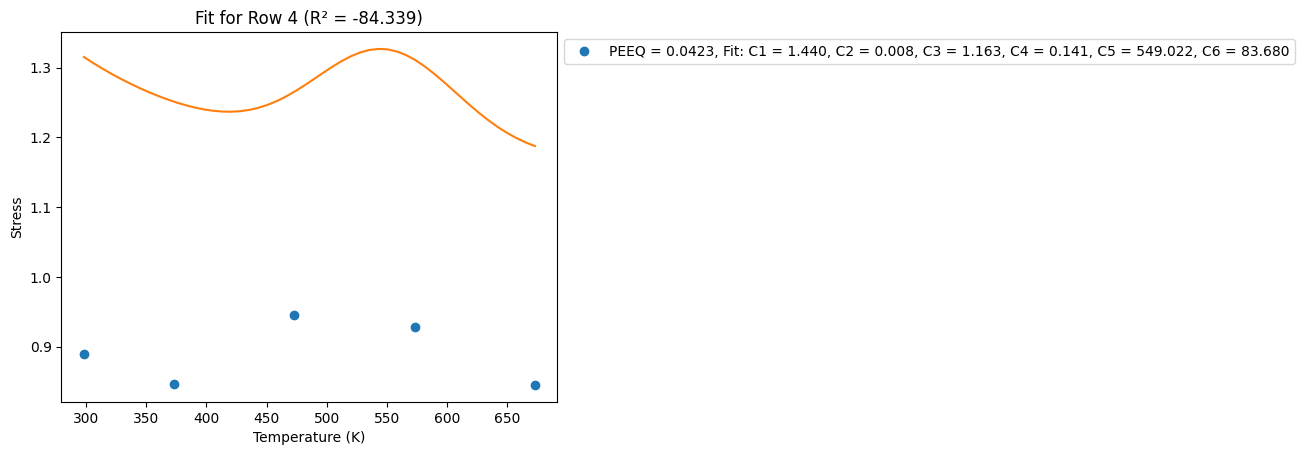

[0.91841833 0.86409292 0.95601844 0.94050685 0.8606838 ]


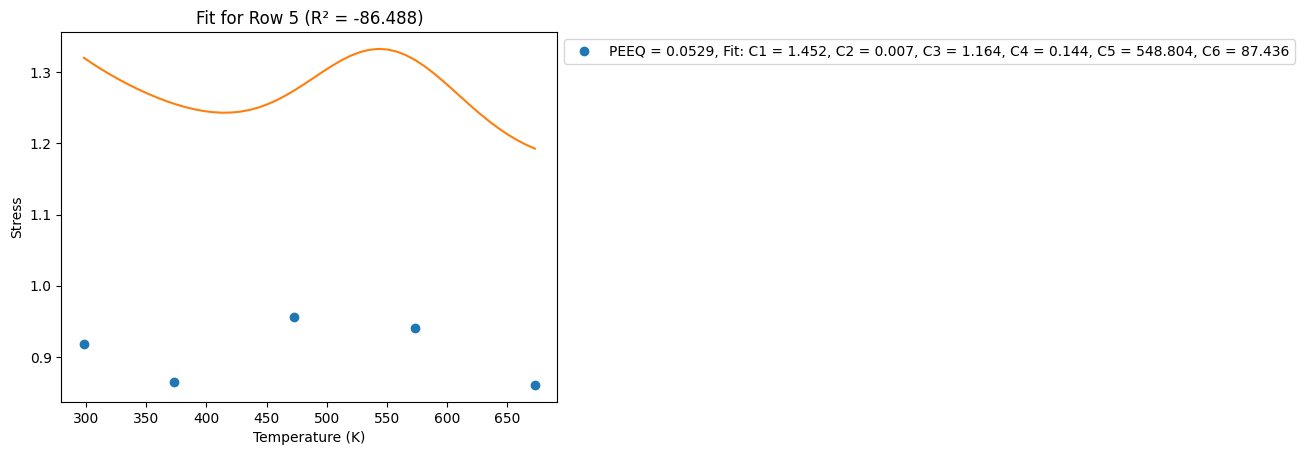

[0.94010838 0.87895686 0.96569731 0.95135806 0.87370845]


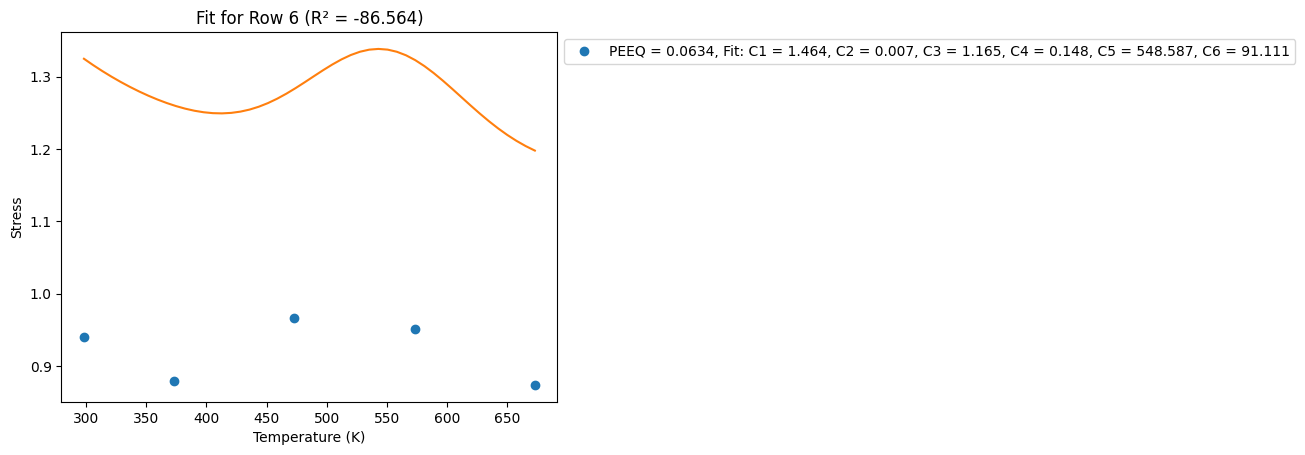

[0.99883836 0.92388113 0.99478338 0.98566447 0.91189236]


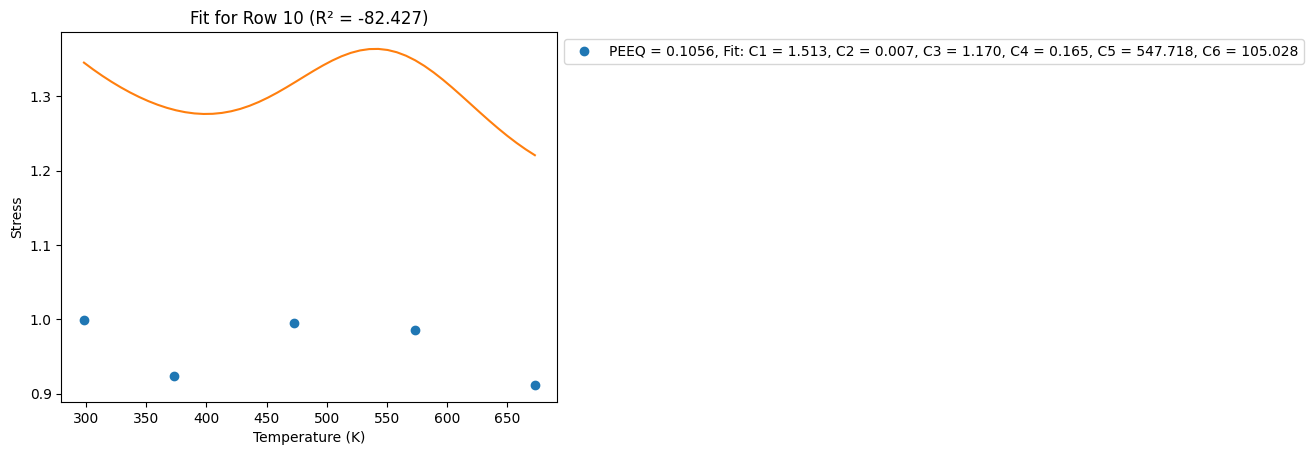

[1.0760897  0.99287665 1.03826957 1.04143701 0.96824808]


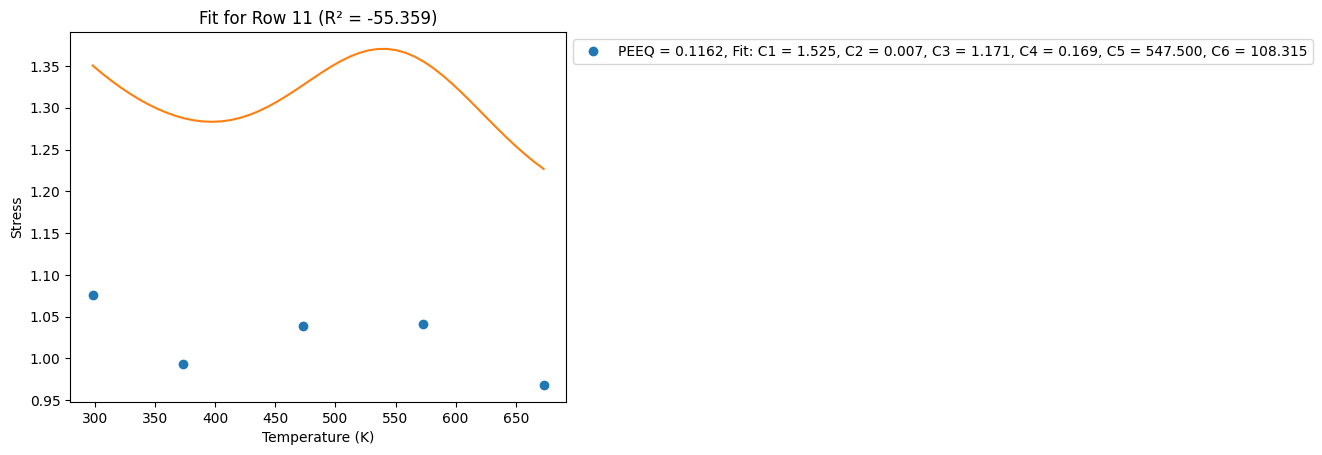

[1.17103283 1.09486118 1.10219269 1.13000116 1.05075578]


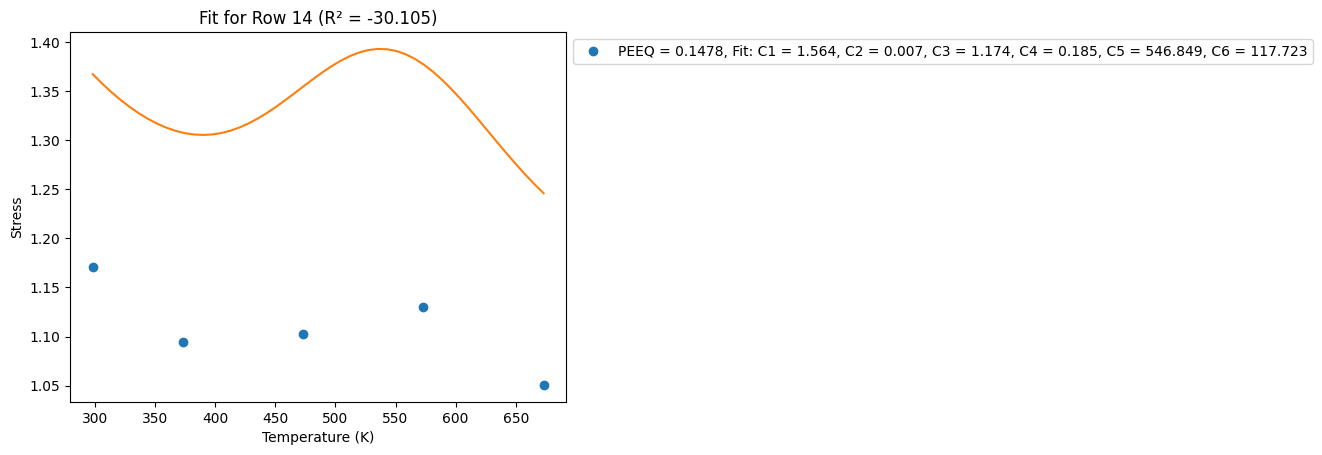

[1.23623113 1.16838805 1.15649353 1.20134625 1.11384613]


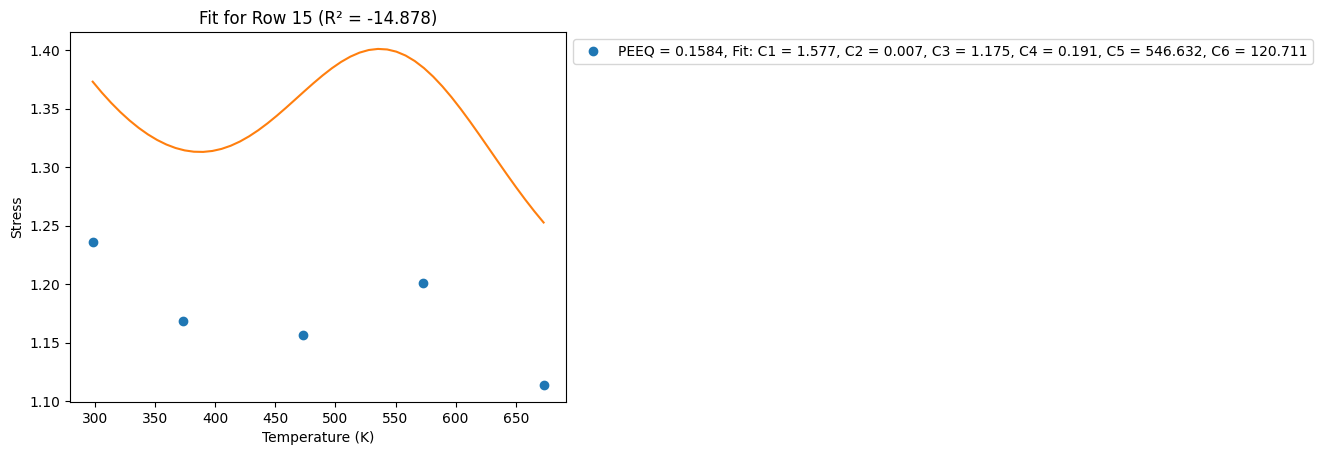

[1.27166669 1.205363   1.19172969 1.240277   1.14740403]


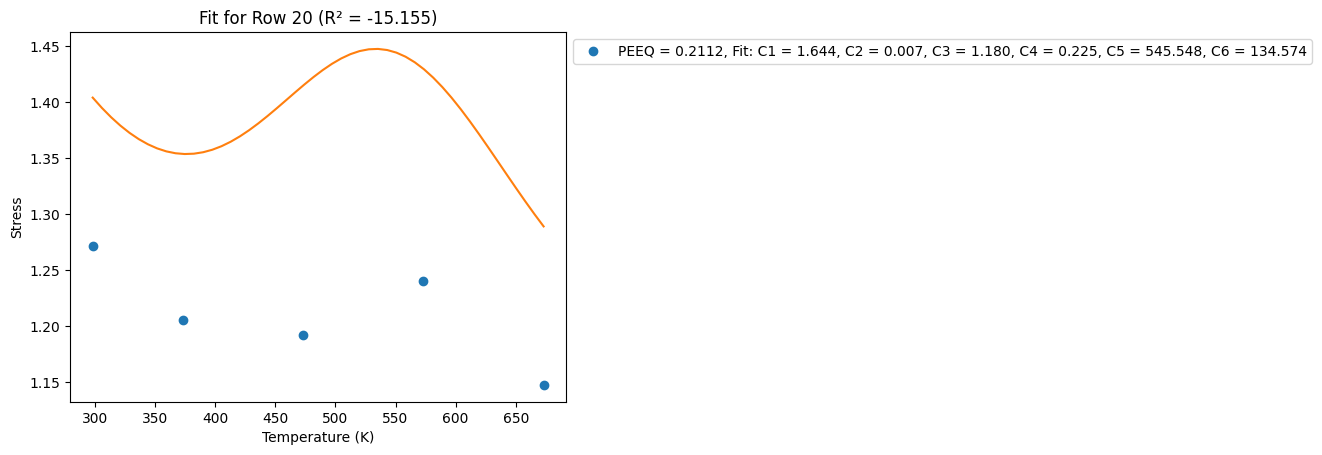

[1.29562861 1.22923286 1.2193726  1.26584081 1.16921512]


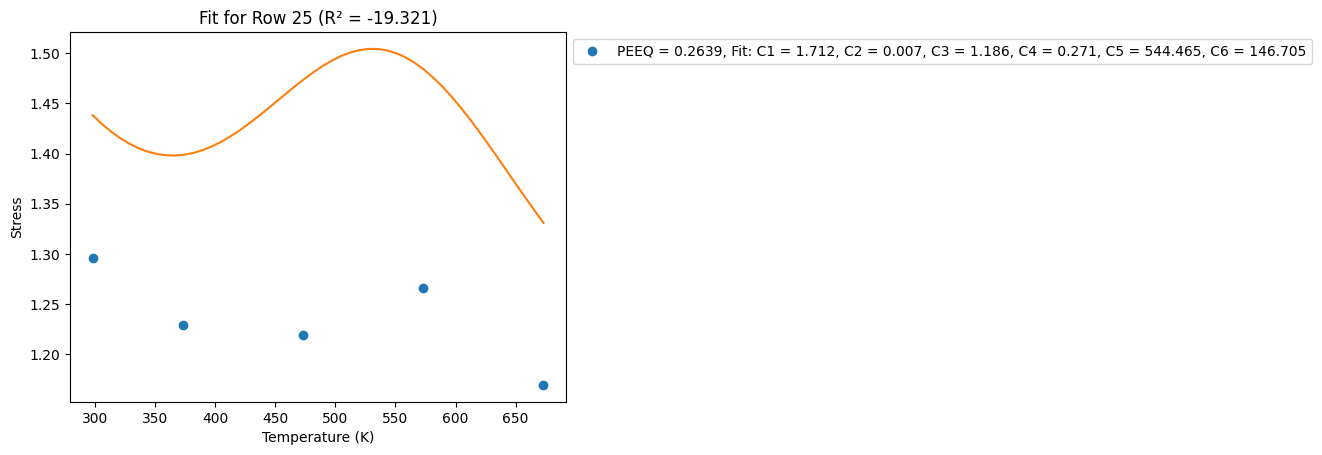

[1.31355813 1.24699619 1.23949175 1.28471575 1.1852409 ]


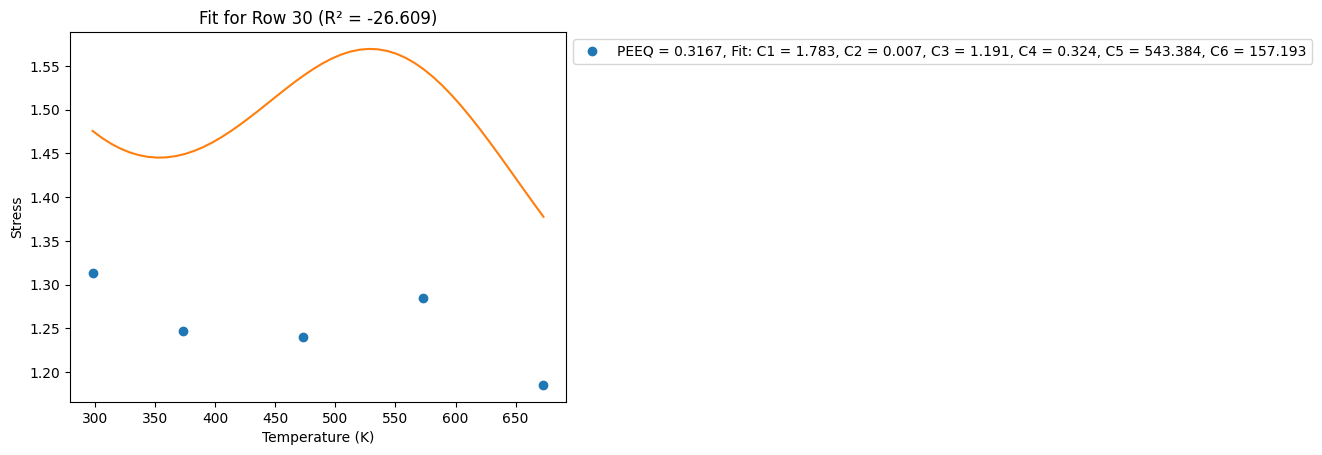

[1.3277916  1.26128786 1.25617647 1.29976094 1.19796878]


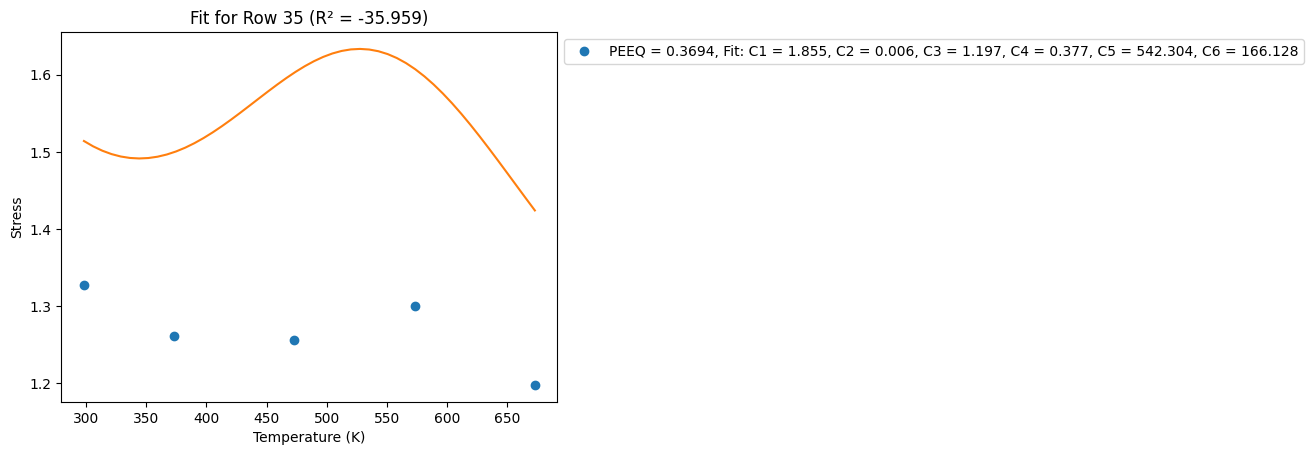

[1.33953993 1.27330904 1.27045829 1.31235727 1.20858555]


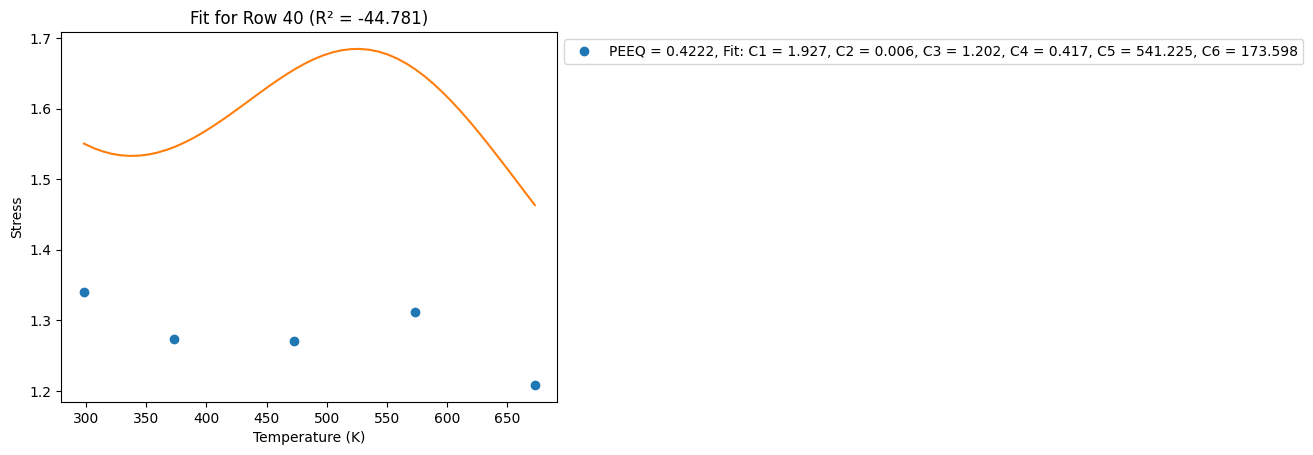

[1.3495089  1.28370615 1.28296096 1.32324532 1.21772659]


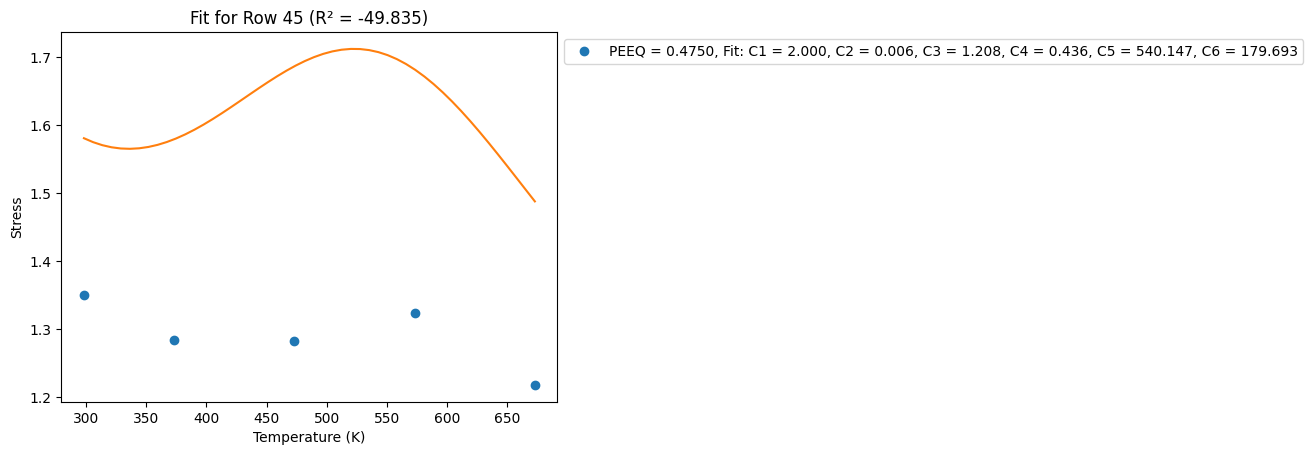

[1.35814456 1.29287376 1.29409117 1.33286229 1.22576864]


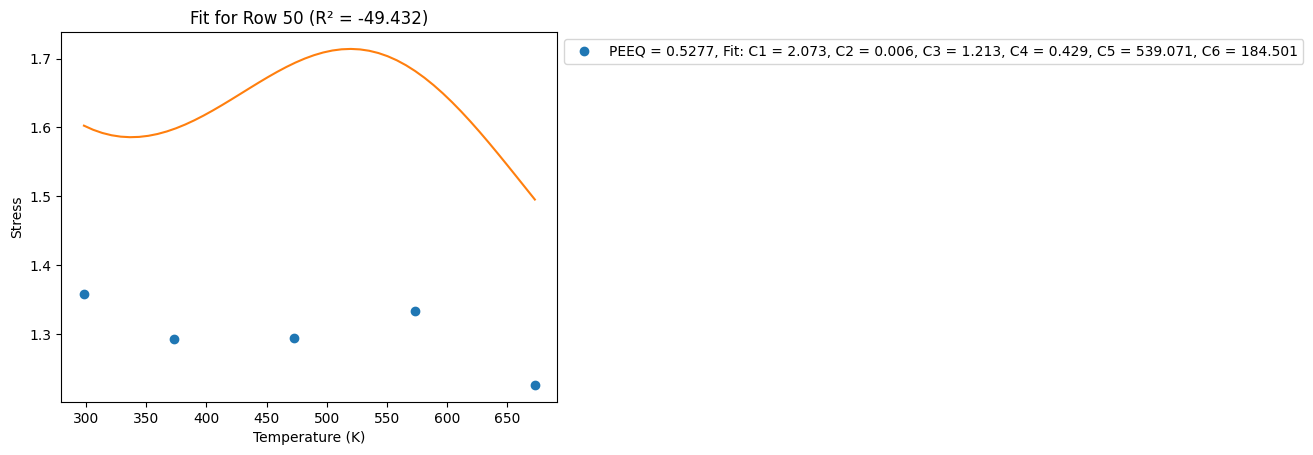

[1.40962974 1.35105444 1.36698562 1.39474406 1.27671463]


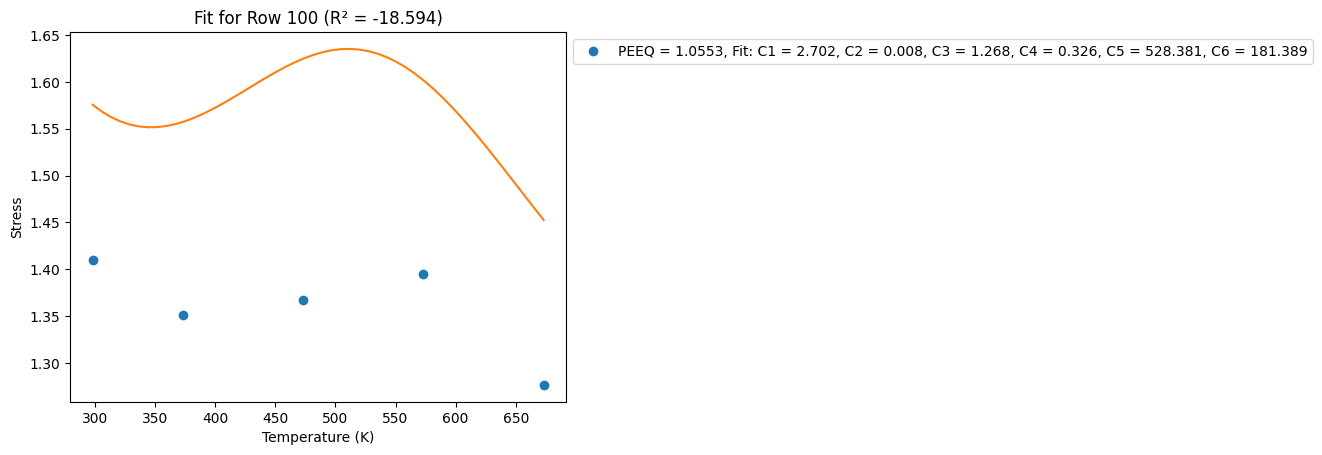

[1.54134103 1.53759516 1.62924008 1.60470544 1.44000429]


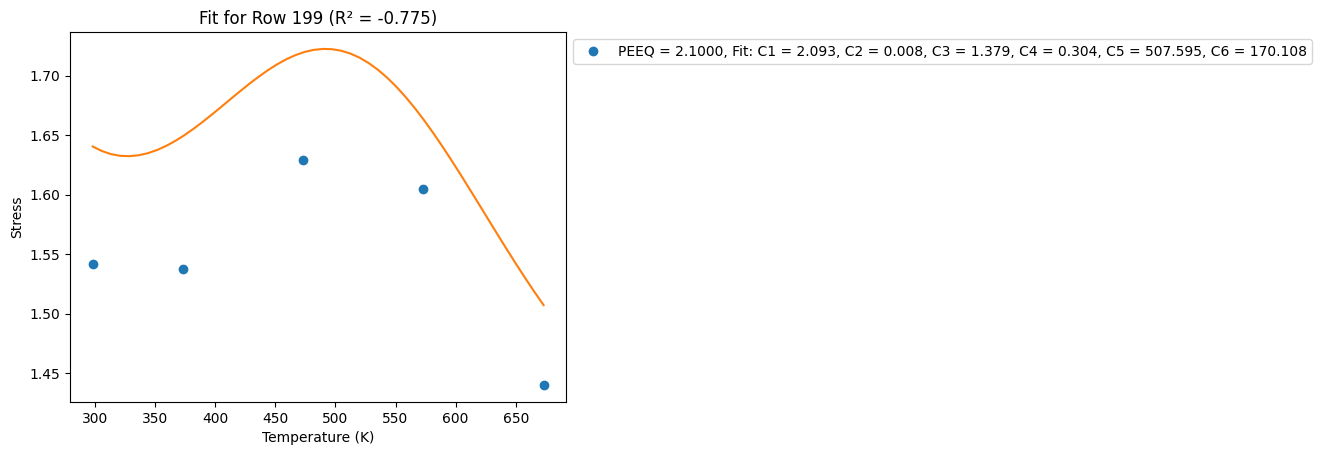

In [579]:
# Temperarute data points
T = np.array([298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 6:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)